## DSC 680 Applied Data Science (T301-2237-1)
## Bellevue University
## Professor Williams
## Author: Jake Meyer
## Date: 06/29/2023
## Project 1 - Sales Forecasting and Late Delivery Prediction

## 1) Business Case

In today’s world, a supplier that understands their customers’ needs and can provide the material (or service) in a timely fashion becomes invaluable. Customers tend to retain suppliers with high performance and this project will focus on two main aspects. The first objective is to develop a model for sales forecasting based on historical data. A foundational understanding of customer demand can help suppliers better manage their own internal supply chain and processes. The second focus is to determine a method for predicting late deliveries. This allows the supplier to correct ongoing issues with late deliveries or communicate with customers early in the process. The relationships between customers and suppliers within a system often get compared to a stream. One supplier may report to a particular customer, then that customer serves as a supplier for an alternate customer downstream and so on... Organizations can relay these strategies to their suppliers “upstream” to continue to meet customer expectations. The research questions associated with this project are outlined below:

**Objective 1: Prediction of Future Sales**
<ul>
<li> Which categories had the highest sales ?
<li> Which customers bought the most ?
<li> Are there any variables strongly correlated with sales?
<li> Which model provides the best accuracy for forecasting sales?
<ul>

**Objective 2: Prediction of Late Deliveries**
<ul>
<li> Which categories had the highest number of late deliveries ?
<li> Does a particular product tend to be late ?
<li> Do customers in a particular geographic area tend to receive late shipments?
<li> Are there any variables strongly correlated with late deliveries?
<li> Which model provides the best accuracy for predicting late deliveries?
<ul>

### Data Set Source

The dataset used for this analysis can be found through the link below: <br>
[DataCo SMART SUPPLY CHAIN FOR BIG DATA](https://data.mendeley.com/datasets/8gx2fvg2k6/5)

### Import Necessary Libraries

In [168]:
'''
Import the necessary libraries for the analysis.
'''
import csv
import numpy as np
import pandas as pd
import operator
from collections import OrderedDict
from pathlib import Path
import pickle

## matplotlib and seaborn imports
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px

## scipy imports
import scipy.stats
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import pointbiserialr

## sklearn imports
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
'''
Check the versions of the packages.
'''
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print('matplotlib version:', matplotlib.__version__)
print('sklearn:', sklearn.__version__)

numpy version: 1.20.3
pandas version: 1.3.4
seaborn version: 0.11.2
matplotlib version: 3.4.3
sklearn: 0.24.2


## 2) Data Understanding

Start by overviewing the data set, univariate analysis, and multivariate analysis.

### Data Set Overview

In [3]:
'''
Utilize the open() function from csv to understand type of encoding for data.
'''
data = open('DataCoSupplyChainDataset.csv', 'r')
data

<_io.TextIOWrapper name='DataCoSupplyChainDataset.csv' mode='r' encoding='cp1252'>

In [4]:
'''
Import the dataset.
Note: A copy of the CSV file was placed into the same directory as this notebook.
Utilize pd.read_csv() to read the file as a pandas data frame.
Use head() function to display the first 10 rows of data of df.
'''
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding = 'cp1252', parse_dates = ['order date (DateOrders)',
                                                                                    'shipping date (DateOrders)'])
df.head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          91.250000          314.640015   Advance shipping   
1        -249.089996          311.359985      Late delivery   
2        -247.779999          309.720001   Shipping on time   
3          22.860001          304.809998   Advance shipping   
4         134.210007          298.250000   Advance shipping   
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  ...  \
0                   0           73  Sporting Goods        Caguas  ...   
1                   1           73  Sporting Goods        Caguas  ...   
2                   0           73  Sporting Goods      San Jose  ...   
3                   0           73  Sporting Goods   Los Angeles  ...   
4                   0           73  Sporting Goods        Caguas  ...   
5                   0           73  Sporting Goods     Tonawanda  ...   
6                   1           73  Sporting Goods        Caguas  ...   
7                   1           73  Sporting Goods         Miami  ...   
8                   1           73  Sporting Goods        Caguas  ...   
9                   1           73  Sporting Goods     San Ramon  ...   

  Order Zipcode Product Card Id Product Category Id  Product Description  \
0           NaN            1360                  73                  NaN   
1           NaN            1360                  73                  NaN   
2           NaN            1360                  73                  NaN   
3           NaN            1360                  73                  NaN   
4           NaN            1360                  73                  NaN   
5           NaN            1360                  73                  NaN   
6           NaN            1360                  73                  NaN   
7           NaN            1360                  73                  NaN   
8           NaN            1360                  73                  NaN   
9           NaN            1360                  73                  NaN   

                                  Product Image  Product Name Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
5  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
6  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
7  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
8  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   
9  http://images.acmesports.sports/Smart+watch   Smart watch         327.75   

  Product

In [5]:
'''
Understand the shape of the dataset.
Display the total size of this dataset.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))
print('This dataset contains {} records.'.format(df.size))

There are 180519 rows and 53 columns in this dataset.
This dataset contains 9567507 records.


In [6]:
'''
Find the type of data within each column initially.
'''
df.dtypes

Type                                     object
Days for shipping (real)                  int64
Days for shipment (scheduled)             int64
Benefit per order                       float64
Sales per customer                      float64
Delivery Status                          object
Late_delivery_risk                        int64
Category Id                               int64
Category Name                            object
Customer City                            object
Customer Country                         object
Customer Email                           object
Customer Fname                           object
Customer Id                               int64
Customer Lname                           object
Customer Password                        object
Customer Segment                         object
Customer State                           object
Customer Street                          object
Customer Zipcode                        float64
Department Id                           

In [7]:
'''
Understand if there are any missing values in the dataset.
'''
df.isna().sum().sort_values(ascending = False)

Product Description              180519
Order Zipcode                    155679
Customer Lname                        8
Customer Zipcode                      3
Type                                  0
Order Profit Per Order                0
Order Item Cardprod Id                0
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Product Price              0
Order Item Profit Ratio               0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Region                          0
order date (DateOrders)               0
Order State                           0
Order Status                          0
Product Card Id                       0
Product Category Id                   0
Product Image                         0
Product Name                          0
Product Price                         0
Product Status                        0


In [8]:
'''
Understand how many missing values are in the dataset initially.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values.'.format(missing_values))

This dataset contains 336209 total missing values.


In [9]:
'''
Reduce the columns that have no data or will not be relevant for sales or late delivery.
'''
drop_list = ['Product Description', 'Order Zipcode', 'Customer Lname', 'Customer Zipcode', 'Product Image',
            'Customer Fname', 'Customer Email', 'Customer Password', 'Product Status', 'Category Id', 'Department Id',
            'Order Id', 'Order Item Cardprod Id', 'Product Card Id', 'Product Category Id', 'Order Item Discount Rate',
            'Longitude', 'Latitude', 'Order Customer Id']
df.drop(drop_list, axis = 1, inplace = True)

In [10]:
print("These are the {} columns that were removed initially from the data set:".format(len(drop_list)))
print(*drop_list, sep = ", ")

These are the 19 columns that were removed initially from the data set:
Product Description, Order Zipcode, Customer Lname, Customer Zipcode, Product Image, Customer Fname, Customer Email, Customer Password, Product Status, Category Id, Department Id, Order Id, Order Item Cardprod Id, Product Card Id, Product Category Id, Order Item Discount Rate, Longitude, Latitude, Order Customer Id


The columns listed above were removed from the data. The reasoning behind removing the columns initially stems from either majority of missing values within the feature, the feature was irrelevant to the objectives, or there was another feature that provided better clarity for the variable. In addition, the customer first and last name will be removed and the Customer Id will be considered for the remainder of the analysis. Although this data set is public, it is good practice for data privacy. Other variables may be removed later in the analyis, but will be included up through this point.

In [11]:
'''
Understand how many missing values are in the dataset after removing irrelevant columns.
'''
missing_values = df.isna().sum().sum()
print('This dataset contains {} total missing values after features have been removed.'.format(missing_values))

This dataset contains 0 total missing values after features have been removed.


In [12]:
'''
Understand the shape of the revised data set.
Display the total size of this data set.
'''
print('There are {} rows and {} columns in this dataset.'.format(df.shape[0], df.shape[1]))
print('This dataset contains {} records.'.format(df.size))

There are 180519 rows and 34 columns in this dataset.
This dataset contains 6137646 records.


In [13]:
'''
Further understand unique values within the features.
'''
df['Type'].unique()

array(['DEBIT', 'TRANSFER', 'CASH', 'PAYMENT'], dtype=object)

In [14]:
'''
Further understand unique values within the features.
'''
df['Days for shipping (real)'].unique()

array([3, 5, 4, 2, 6, 0, 1], dtype=int64)

In [15]:
'''
Further understand unique values within the features.
'''
df['Days for shipment (scheduled)'].unique()

array([4, 1, 2, 0], dtype=int64)

In [16]:
'''
Further understand unique values within the features.
'''
df['Delivery Status'].unique()

array(['Advance shipping', 'Late delivery', 'Shipping on time',
       'Shipping canceled'], dtype=object)

In [17]:
'''
Further understand unique values within the features.
'''
df['Late_delivery_risk'].unique()

array([0, 1], dtype=int64)

In [18]:
'''
Further understand unique values within the features.
'''
df['Category Name'].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

In [19]:
'''
Further understand unique values within the features.
'''
print("Number of unique product categories: {}".format(len(df['Category Name'].unique())))

Number of unique product categories: 50


In [20]:
'''
Further understand unique values within the features.
'''
df['Customer City'].unique()

array(['Caguas', 'San Jose', 'Los Angeles', 'Tonawanda', 'Miami',
       'San Ramon', 'Freeport', 'Salinas', 'Peabody', 'Canovanas',
       'Paramount', 'Mount Prospect', 'Long Beach', 'Rancho Cordova',
       'Billings', 'Wilkes Barre', 'Roseville', 'Bellflower', 'Wheaton',
       'Detroit', 'Dallas', 'Carlisle', 'Newark', 'Panorama City',
       'Atlanta', 'Fremont', 'Rochester', 'Bayamon', 'Guayama',
       'Juana Diaz', 'Fort Washington', 'Bakersfield', 'Corona',
       'Cincinnati', 'Germantown', 'Carrollton', 'Houston', 'Ewa Beach',
       'Lakewood', 'Rome', 'Vista', 'Fort Worth', 'Fond Du Lac',
       'Philadelphia', 'Ontario', 'Oviedo', 'Buffalo', 'Honolulu',
       'Oceanside', 'North Tonawanda', 'Clovis', 'Jamaica',
       'Granite City', 'Medford', 'Pomona', 'Tempe', 'Santa Ana', 'York',
       'Aurora', 'Simi Valley', 'Silver Spring', 'Saint Paul',
       'San Antonio', 'Bronx', 'Greenville', 'Morristown', 'San Diego',
       'Oxnard', 'Albuquerque', 'Amarillo', 'Lutz', 'B

In [21]:
'''
Further understand unique values within the features.
'''
df['Customer Country'].unique()

array(['Puerto Rico', 'EE. UU.'], dtype=object)

In [22]:
'''
United States is in Estados Unidos (Spanish). Switch value to United States in data frame.
'''
df['Customer Country'] = df['Customer Country'].replace({'EE. UU.': 'United States'})

In [23]:
'''
Further understand unique values within the features.
'''
df['Customer Id'].unique()

array([20755, 19492, 19491, ..., 18579, 16244,  2677], dtype=int64)

In [24]:
'''
Further understand unique values within the features.
'''
print("Number of customers: {}".format(len(df['Customer Id'].unique())))

Number of customers: 20652


In [25]:
'''
Further understand unique values within the features.
'''
df['Customer Segment'].unique()

array(['Consumer', 'Home Office', 'Corporate'], dtype=object)

In [26]:
'''
Further understand unique values within the features.
'''
df['Customer State'].unique()

array(['PR', 'CA', 'NY', 'FL', 'MA', 'IL', 'MT', 'PA', 'MI', 'TX', 'DE',
       'GA', 'MD', 'OH', 'HI', 'NJ', 'WI', 'AZ', 'CO', 'MN', 'NC', 'NM',
       'OR', 'SC', 'VA', 'UT', 'WA', 'KY', 'WV', 'RI', 'CT', 'LA', 'TN',
       'DC', 'ND', 'MO', 'IN', 'ID', 'NV', 'KS', 'AR', 'OK', 'AL', 'IA',
       '95758', '91732'], dtype=object)

In [27]:
'''
Further understand unique values within the features.
'''
df['Department Name'].unique()

array(['Fitness', 'Apparel', 'Golf', 'Footwear', 'Outdoors', 'Fan Shop',
       'Technology', 'Book Shop', 'Discs Shop', 'Pet Shop',
       'Health and Beauty '], dtype=object)

In [28]:
'''
Further understand unique values within the features.
'''
print("Number of departments: {}".format(len(df['Department Name'].unique())))

Number of departments: 11


In [29]:
'''
Further understand unique values within the features.
'''
df['Market'].unique()

array(['Pacific Asia', 'USCA', 'Africa', 'Europe', 'LATAM'], dtype=object)

In [30]:
'''
Further understand unique values within the features.
'''
df['Order City'].unique()

array(['Bekasi', 'Bikaner', 'Townsville', ..., 'Tongling', 'Liuyang',
       'Nashua'], dtype=object)

In [31]:
'''
Further understand unique values within the features.
'''
df['Order Country'].unique()

array(['Indonesia', 'India', 'Australia', 'China', 'Japón',
       'Corea del Sur', 'Singapur', 'Turquía', 'Mongolia',
       'Estados Unidos', 'Nigeria', 'República Democrática del Congo',
       'Senegal', 'Marruecos', 'Alemania', 'Francia', 'Países Bajos',
       'Reino Unido', 'Guatemala', 'El Salvador', 'Panamá',
       'República Dominicana', 'Venezuela', 'Colombia', 'Honduras',
       'Brasil', 'México', 'Uruguay', 'Argentina', 'Cuba', 'Perú',
       'Nicaragua', 'Ecuador', 'Angola', 'Sudán', 'Somalia',
       'Costa de Marfil', 'Egipto', 'Italia', 'España', 'Suecia',
       'Austria', 'Canada', 'Madagascar', 'Argelia', 'Liberia', 'Zambia',
       'Níger', 'SudAfrica', 'Mozambique', 'Tanzania', 'Ruanda', 'Israel',
       'Nueva Zelanda', 'Bangladés', 'Tailandia', 'Irak', 'Arabia Saudí',
       'Filipinas', 'Kazajistán', 'Irán', 'Myanmar (Birmania)',
       'Uzbekistán', 'Benín', 'Camerún', 'Kenia', 'Togo', 'Ucrania',
       'Polonia', 'Portugal', 'Rumania', 'Trinidad y Tobago',


In [32]:
'''
Further understand unique values within the features.
'''
print("Number of countries for orders: {}".format(len(df['Order Country'].unique())))

Number of countries for orders: 164


In [33]:
'''
United States is in Estados Unidos (Spanish). Switch value to United States in data frame.
'''
df['Order Country'] = df['Order Country'].replace({'Estados Unidos': 'United States'})

In [34]:
'''
Further understand unique values within the features.
'''
df['Order Item Id'].unique()

array([180517, 179254, 179253, ...,  65129,  65126,  65113], dtype=int64)

In [35]:
'''
Further understand unique values within the features.
'''
print("Number of orders: {}".format(len(df['Order Item Id'].unique())))

Number of orders: 180519


In [36]:
'''
Further understand unique values within the features.
'''
df['Order Region'].unique()

array(['Southeast Asia', 'South Asia', 'Oceania', 'Eastern Asia',
       'West Asia', 'West of USA ', 'US Center ', 'West Africa',
       'Central Africa', 'North Africa', 'Western Europe',
       'Northern Europe', 'Central America', 'Caribbean', 'South America',
       'East Africa', 'Southern Europe', 'East of USA', 'Canada',
       'Southern Africa', 'Central Asia', 'Eastern Europe',
       'South of  USA '], dtype=object)

In [37]:
'''
Further understand unique values within the features.
'''
df['Order State'].unique()

array(['Java Occidental', 'Rajastán', 'Queensland', ...,
       'Bistrita-Nasaud', 'Tottori', 'Khorezm'], dtype=object)

In [38]:
'''
Further understand unique values within the features.
'''
df['Order Status'].unique()

array(['COMPLETE', 'PENDING', 'CLOSED', 'PENDING_PAYMENT', 'CANCELED',
       'PROCESSING', 'SUSPECTED_FRAUD', 'ON_HOLD', 'PAYMENT_REVIEW'],
      dtype=object)

In [39]:
df['Product Name'].unique()

array(['Smart watch ', 'Perfect Fitness Perfect Rip Deck',
       "Under Armour Girls' Toddler Spine Surge Runni",
       "Nike Men's Dri-FIT Victory Golf Polo",
       "Under Armour Men's Compression EV SL Slide",
       "Under Armour Women's Micro G Skulpt Running S",
       "Nike Men's Free 5.0+ Running Shoe",
       "Glove It Women's Mod Oval 3-Zip Carry All Gol",
       'Bridgestone e6 Straight Distance NFL San Dieg',
       "Columbia Men's PFG Anchor Tough T-Shirt",
       'Titleist Pro V1x Golf Balls',
       'Bridgestone e6 Straight Distance NFL Tennesse',
       'Polar FT4 Heart Rate Monitor', 'ENO Atlas Hammock Straps',
       "adidas Men's F10 Messi TRX FG Soccer Cleat",
       "Brooks Women's Ghost 6 Running Shoe",
       "Nike Men's CJ Elite 2 TD Football Cleat",
       "Diamondback Women's Serene Classic Comfort Bi",
       'Industrial consumer electronics', 'Web Camera', 'Dell Laptop',
       'SOLE E25 Elliptical', 'Elevation Training Mask 2.0',
       "adidas Men's Germ

In [40]:
'''
Further understand unique values within the features.
'''
print("Number of unique products: {}".format(len(df['Product Name'].unique())))

Number of unique products: 118


In [41]:
'''
Further understand unique values within the features.
'''
df['Shipping Mode'].unique()

array(['Standard Class', 'First Class', 'Second Class', 'Same Day'],
      dtype=object)

### Highlights for Data Set Overview: 
<ul>
    <li> The data set consisted of 53 features and 180519 rows initially (9567507 records).
    <li> There were 16 columns removed for either majority missing data, duplicate feature information, or irrelevant to the objectives.
    <li> No missing data observed in the data set after the 16 columns were removed.
    <li> Order Date and Ship Date were converted to DateTime data types.
    <li> Orders come from 164 different Countries. 
    <li> Customer Countries are only 2 (United States and Puerto Rico)
    <li> The data set originally had the United States as EE. US. or Estados Unidos. This was converted to United States in both cases.
    <li> There were 20652 unique Customer ID's.
    <li> There were 180519 Orders included in this data (row length).
    <li> There were 11 unique departments with 118 different products sold and 50 different product categories.
    <li> Recommend potentially creating another feature such as Difference (in Days) Between Ship and Order Dates.
<ul>

### Univariate Analysis

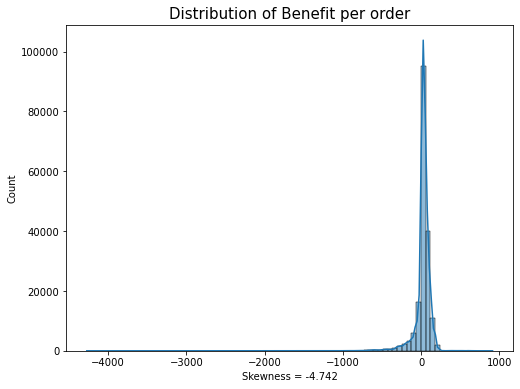

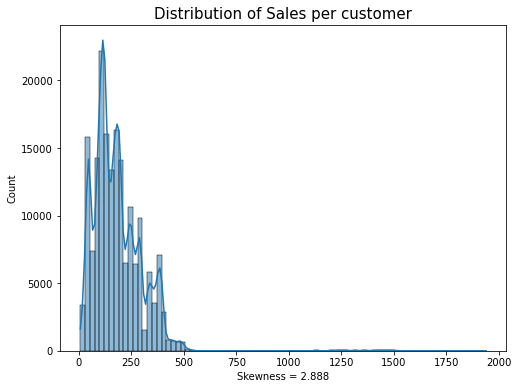

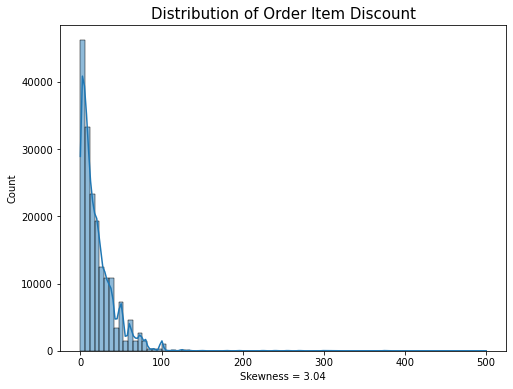

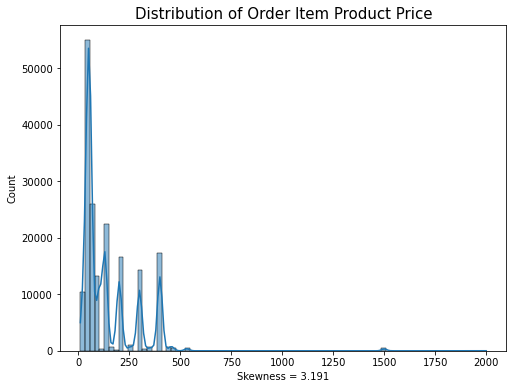

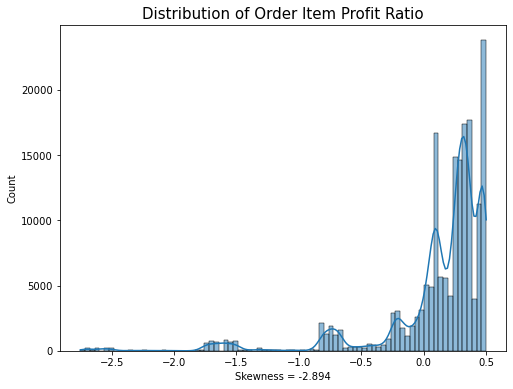

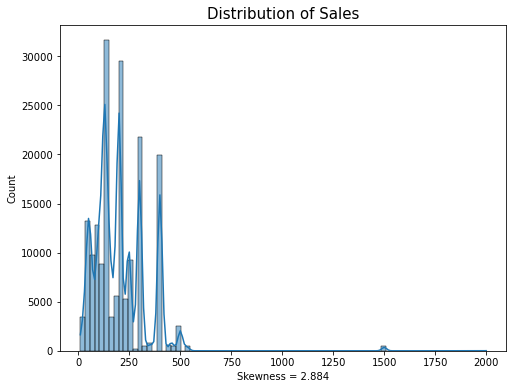

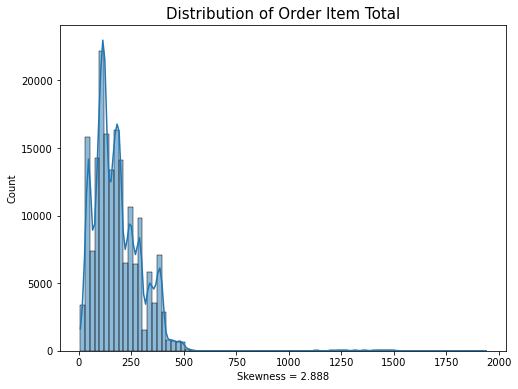

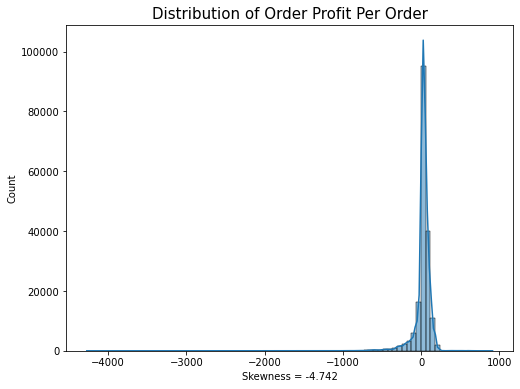

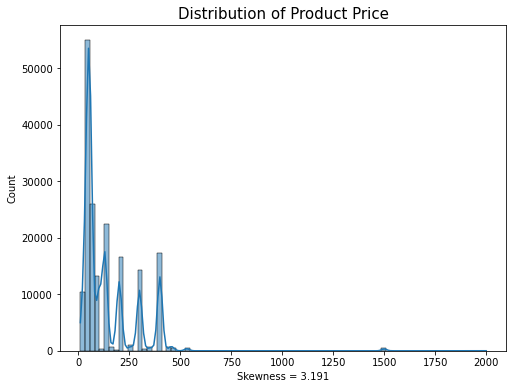

In [42]:
'''
Understand the distribution for the continuous numeric features within the dataset.
The code below will loop through each feature and illustrate how the feature is distributed.
The skewness value will also be included below the chart.
'''
cont_columns = df[['Benefit per order', 'Sales per customer', 'Order Item Discount',
                      'Order Item Product Price', 'Order Item Profit Ratio','Sales', 'Order Item Total',
                      'Order Profit Per Order', 'Product Price']]

for col in cont_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x =df[col], kde = True, multiple = 'stack', bins = 85) 
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xlabel(f"Skewness = {round(df[col].skew(),3)}", fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

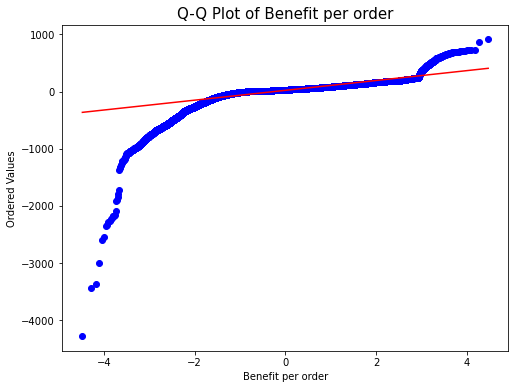

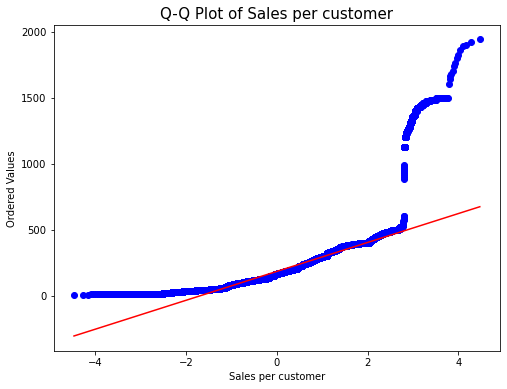

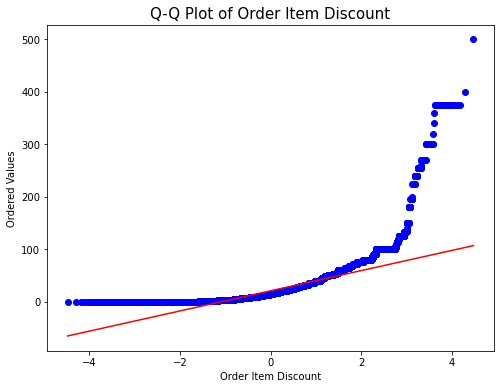

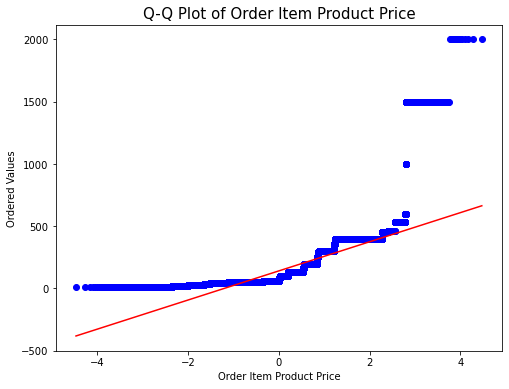

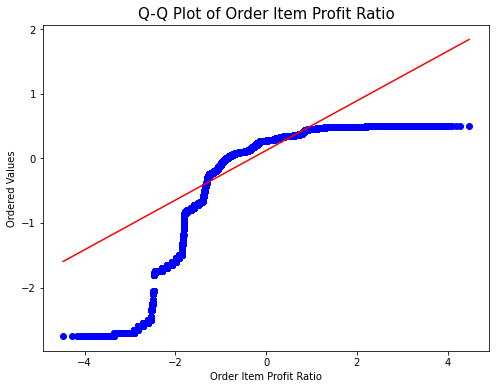

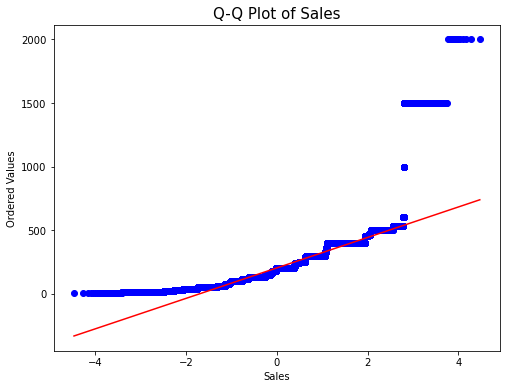

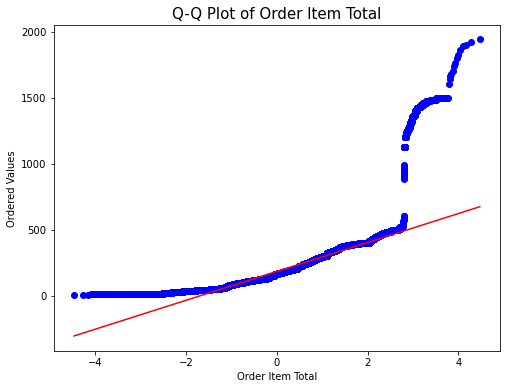

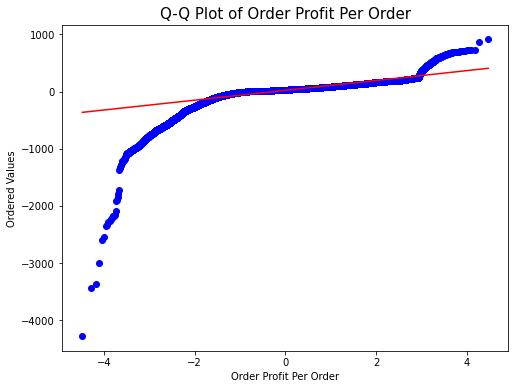

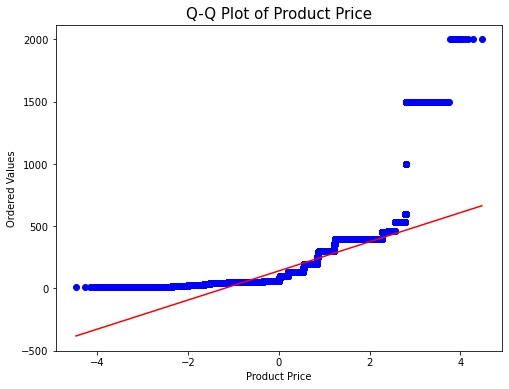

In [43]:
'''
Understand whether the continuous numeric features within the dataset are normally distributed with a Q-Q Plot.
The code below will loop through each feature and illustrate how the feature is distributed.
'''
cont_columns = df[['Benefit per order', 'Sales per customer', 'Order Item Discount',
                      'Order Item Product Price', 'Order Item Profit Ratio','Sales', 'Order Item Total',
                      'Order Profit Per Order', 'Product Price']]

for col in cont_columns:
    plt.figure(figsize=(8,6))
    fig = stats.probplot(df[col], plot = sns.mpl.pyplot) 
    plt.title("Q-Q Plot of {}".format(col), fontsize=15) 
    plt.xlabel("{}".format(col), fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

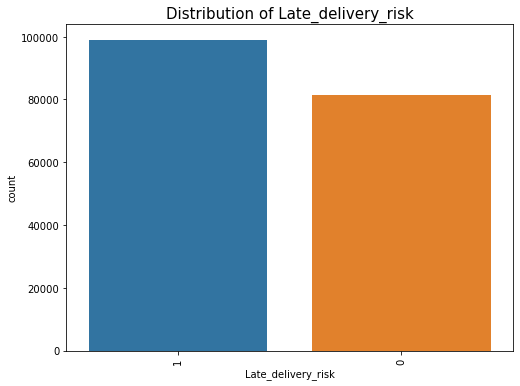

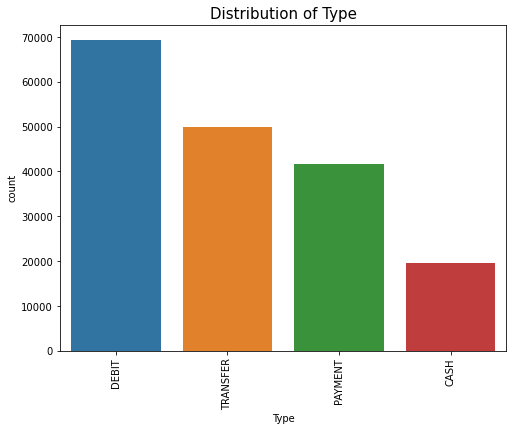

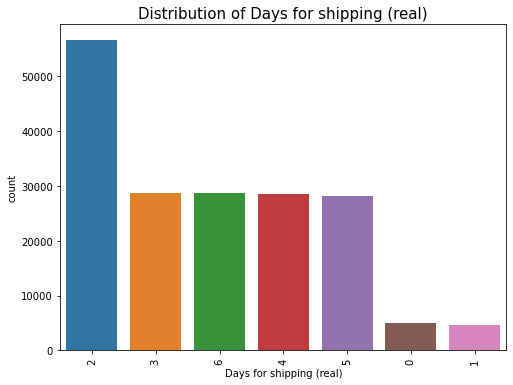

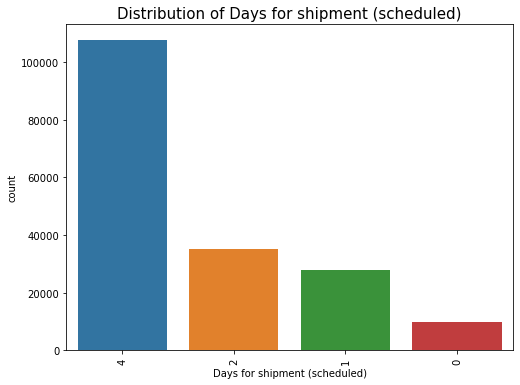

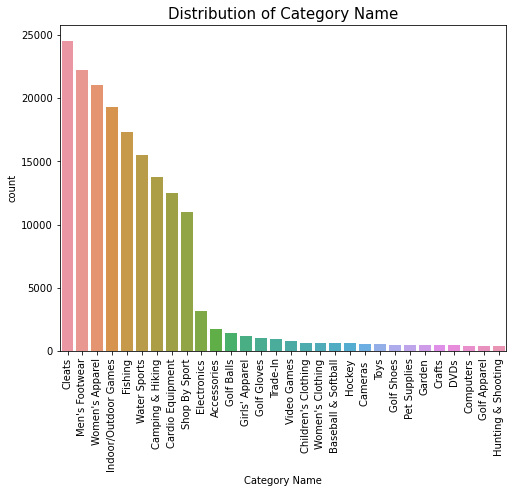

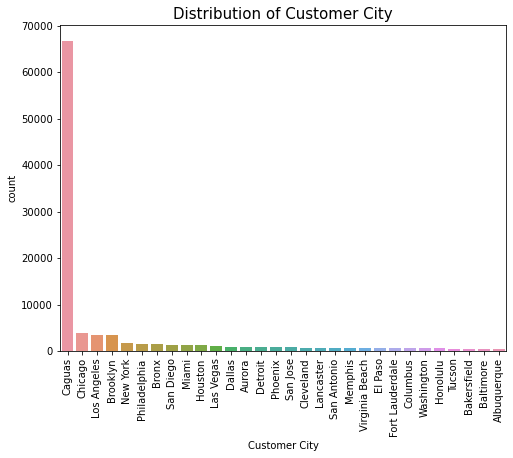

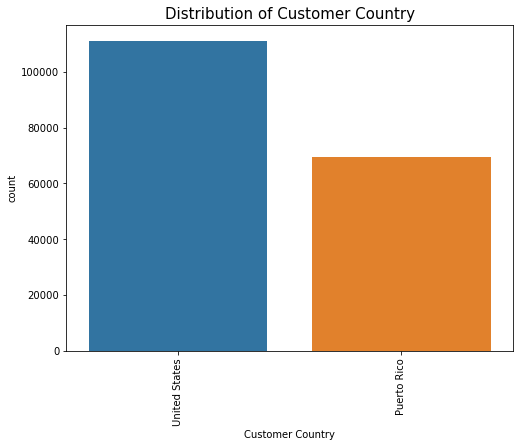

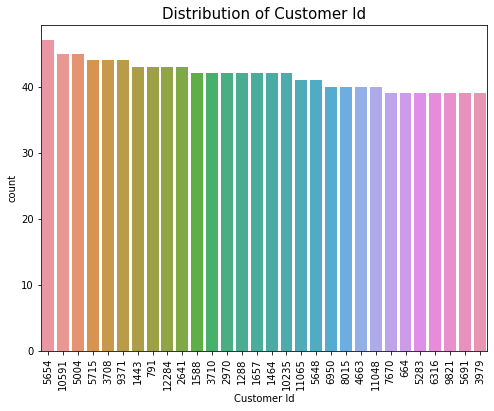

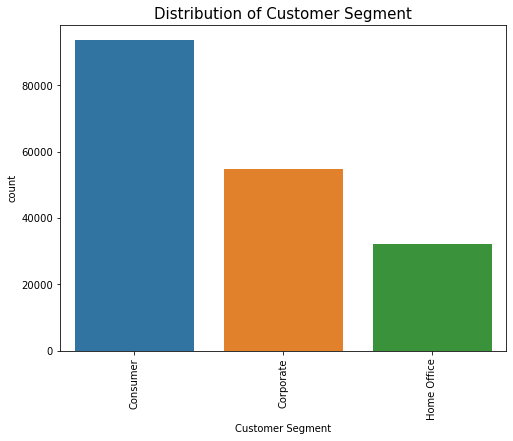

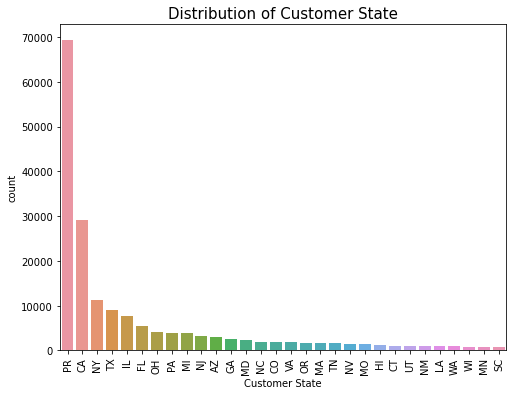

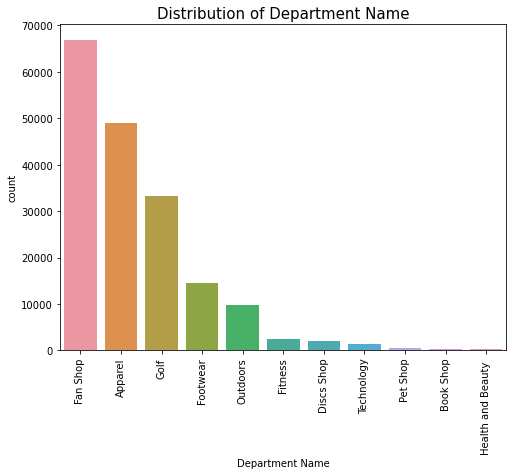

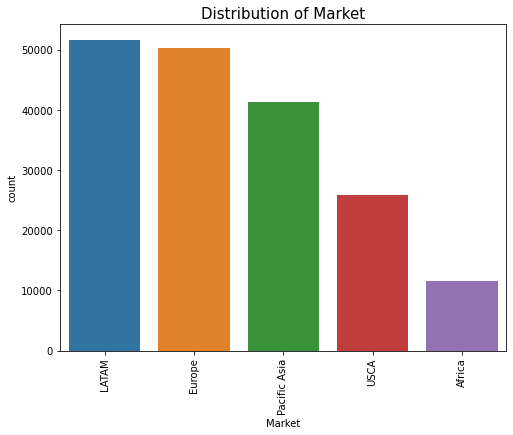

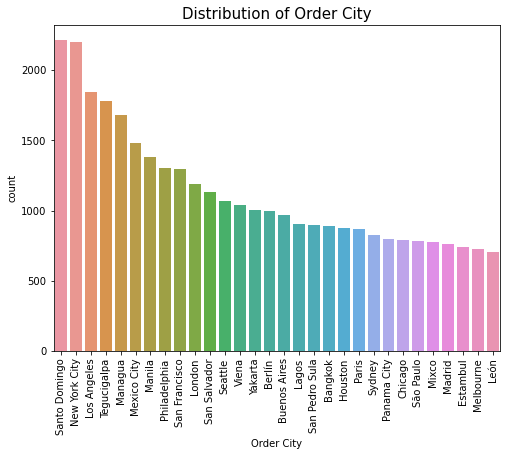

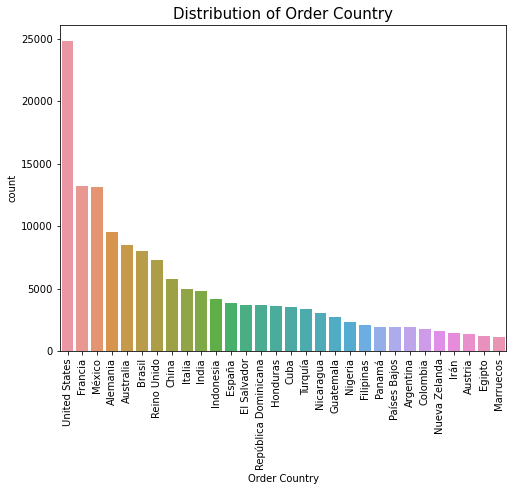

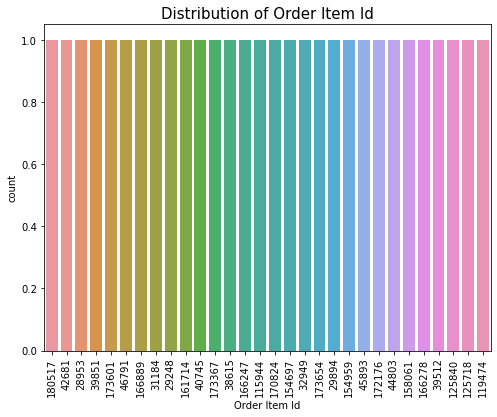

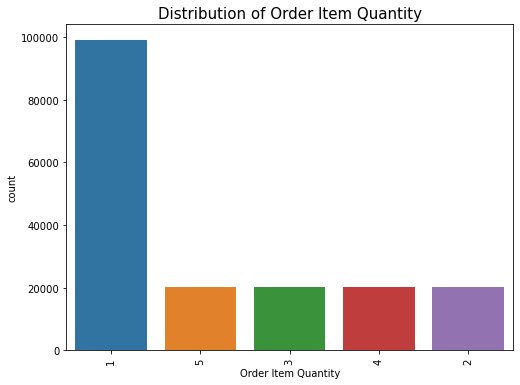

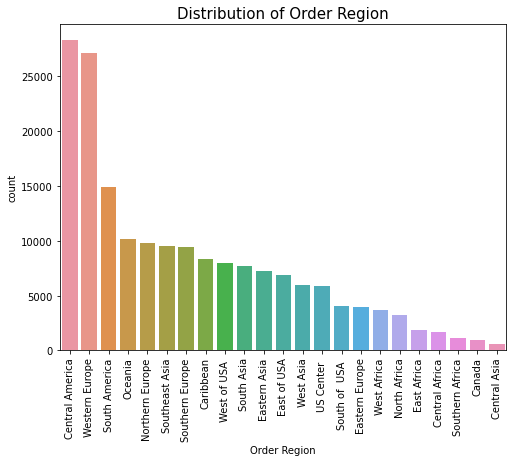

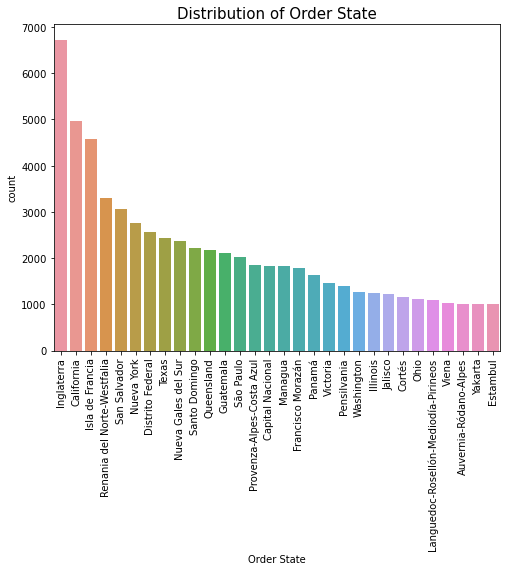

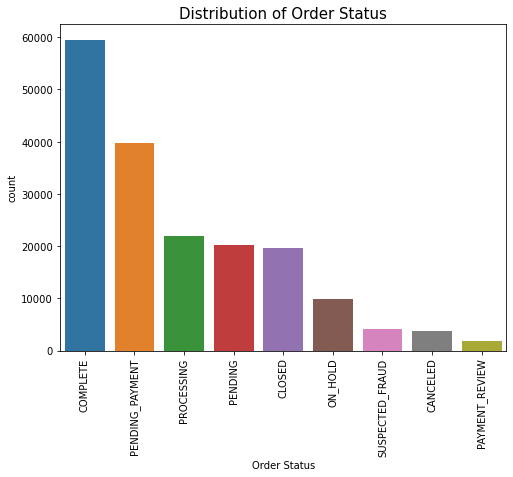

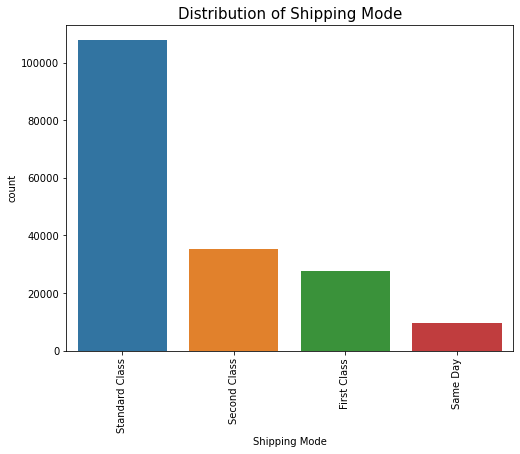

In [44]:
'''
Understand the balance of the categorical and discrete features with a countplot.
Late Delivery Risk is 1 (Late Delivery) and 0 (Not Late Delivery).
The code below will loop through each feature and illustrate the count of unique items within each feature.
Useful for understanding balance within the data.
'''
cat_disc_columns = df[['Late_delivery_risk', 'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
                      'Category Name','Customer City', 'Customer Country',
                      'Customer Id', 'Customer Segment', 'Customer State', 'Department Name',
                      'Market', 'Order City', 'Order Country', 'Order Item Id', 'Order Item Quantity',
                      'Order Region', 'Order State', 'Order Status', 'Shipping Mode']]

for col in cat_disc_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col], order = df[col].value_counts().iloc[:30].index)
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xticks(fontsize=10, rotation = 90) 
    plt.yticks(fontsize=10)
    plt.show()


### Highlights for Univariate Analysis: 
<ul>
    <li> Continuous, numerical, features within the data tend to have a skew and appear non-normal based on the Q-Q Plots.
    <li> Most customers spend less than \$500, but there are some that spend between \$1000-\$1500.
    <li> The company is not making profit on roughly half of its orders.
    <li> Product price feature is similarly distributed as Order Item Product Price.
    <li> Balance for late deliveries within the data set appears sufficient to continue with the analysis.
    <li> Most transaction types are debit, transfers, and payments. Least is cash transactions.
    <li> It most often takes 2 days to ship items, although it can also vary up to 6 days.
    <li> Most orders have 4 days scheduled for shipments.
    <li> Most orders are for cleats, Men's Footwear, Women's Apparel, Indoor/Outdoor Games, Fishing, Water Sports, Camping and Hiking, and Cardio Equipiment.
    <li> Customers tend to be Consumers, Corporate, and Home Office (in that order).
    <li> Most orders are from the Fan Shop, Apparel, Golf, Footwear, or Outdoors.
    <li> Most orders only include 1 item.
    <li> Most orders have been complete, however there are a lot of pending payment, processing, and pending orders.
    <li> Most orders are shipped Standard Class. 
<ul>

### Multivariate Analysis

The Late_delivery_risk will be grouped within the previous charts to see if there are any obvious findings.

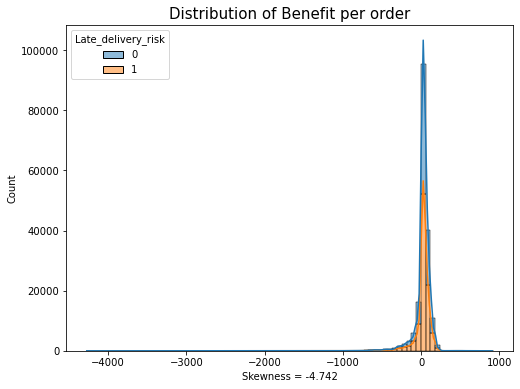

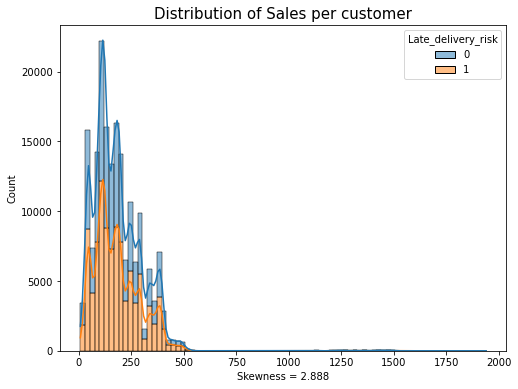

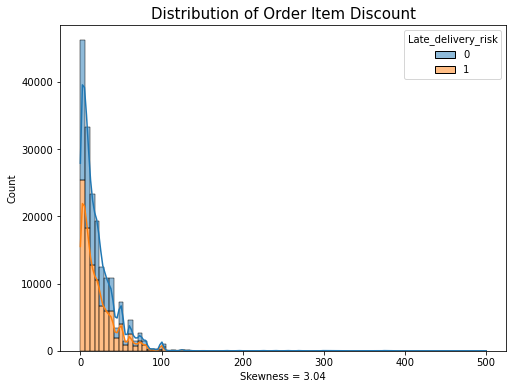

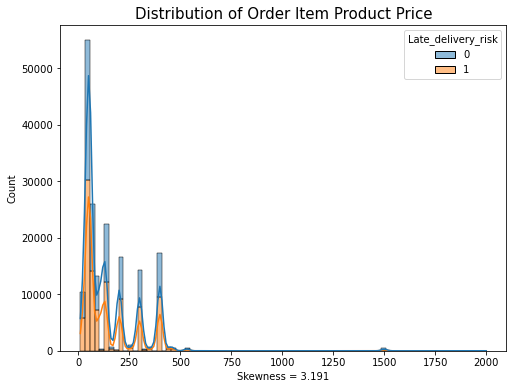

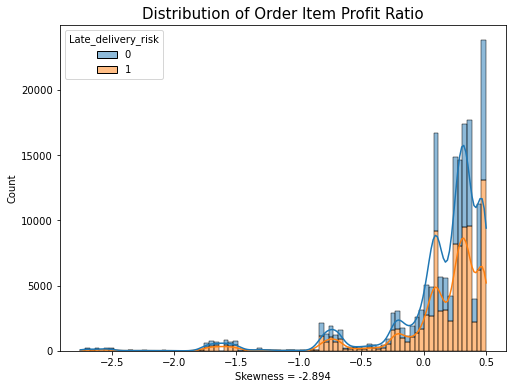

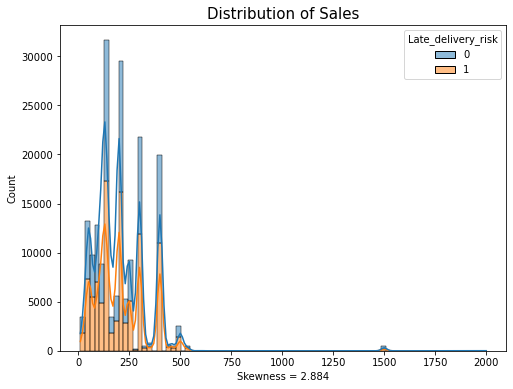

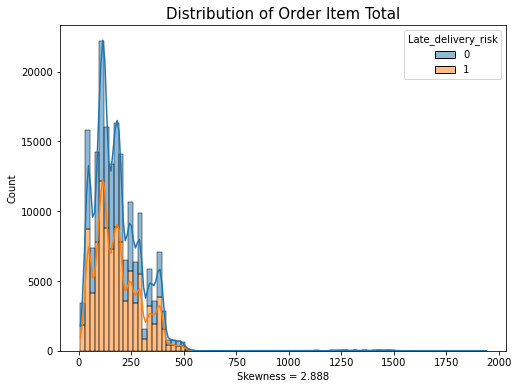

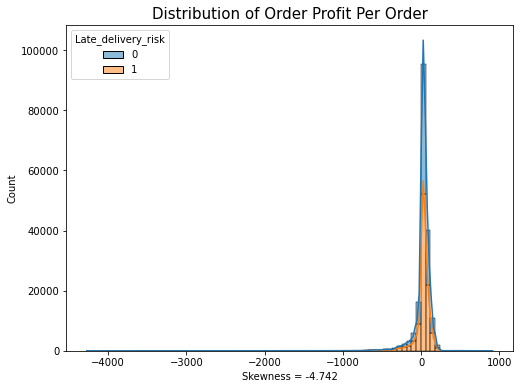

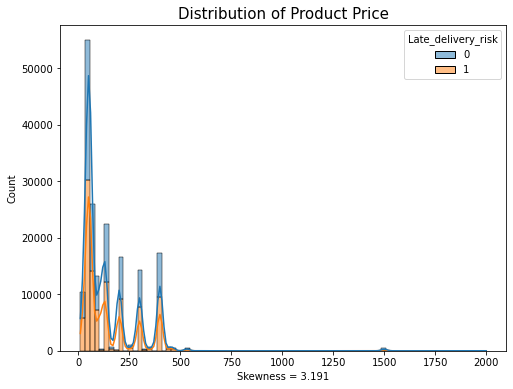

In [45]:
'''
Understand the distribution for the continuous numeric features within the dataset.
The code below will loop through each feature and illustrate how the feature is distributed.
The skewness value will also be included below the chart.
'''
cont_columns = df[['Benefit per order', 'Sales per customer', 'Order Item Discount',
                      'Order Item Product Price', 'Order Item Profit Ratio','Sales', 'Order Item Total',
                      'Order Profit Per Order', 'Product Price']]

for col in cont_columns:
    plt.figure(figsize=(8,6))
    sns.histplot(x =df[col], hue = df['Late_delivery_risk'], kde = True, multiple = 'stack', bins = 85) 
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xlabel(f"Skewness = {round(df[col].skew(),3)}", fontsize=10) 
    plt.xticks(fontsize=10) 
    plt.yticks(fontsize=10)
    plt.show()

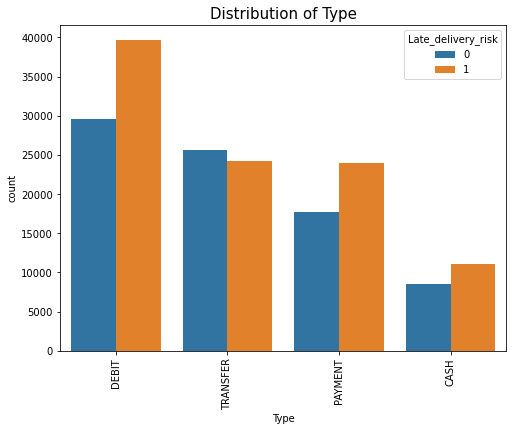

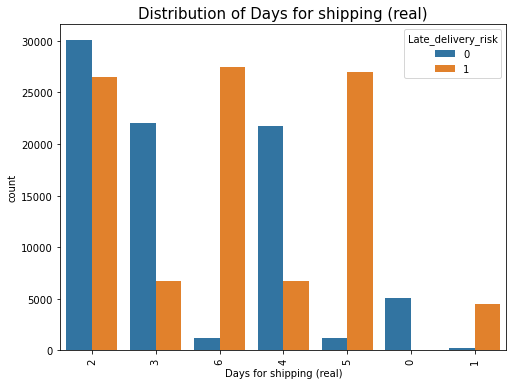

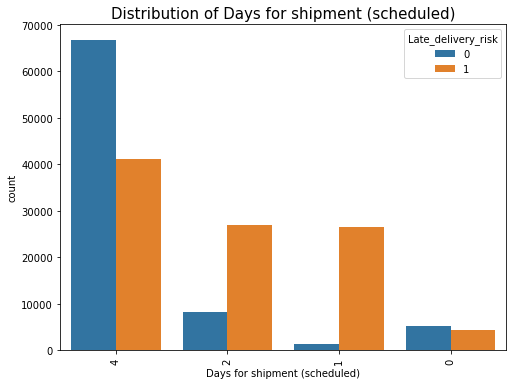

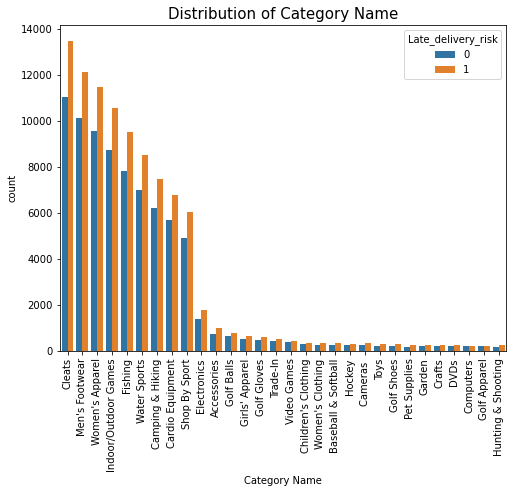

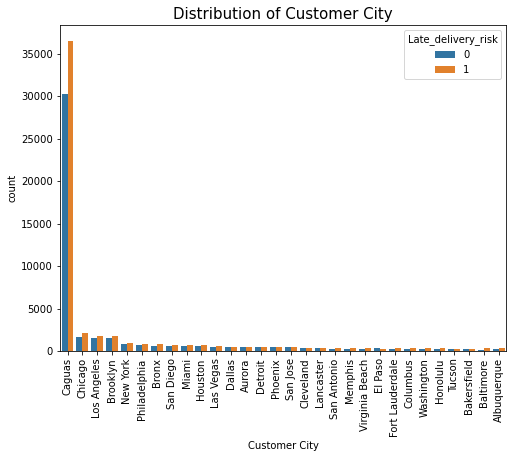

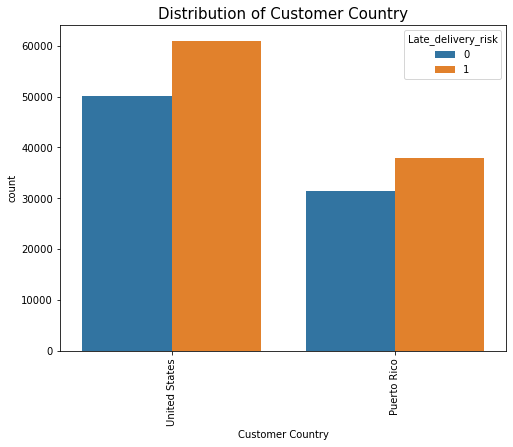

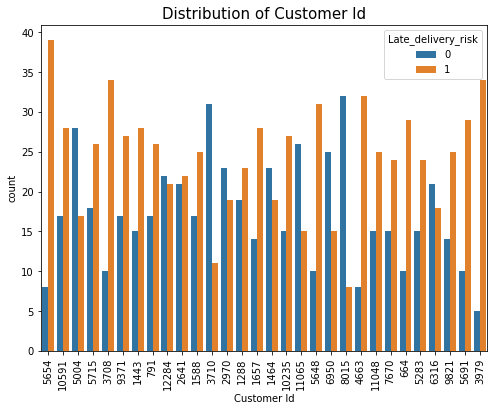

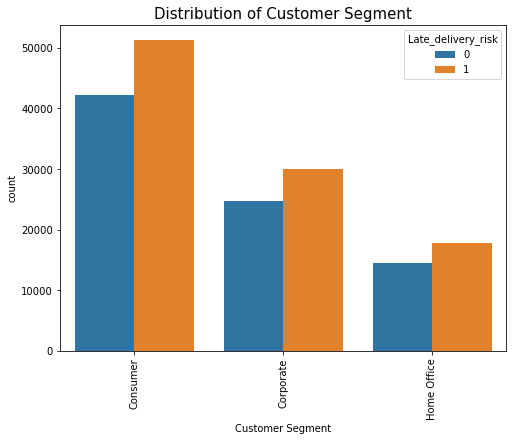

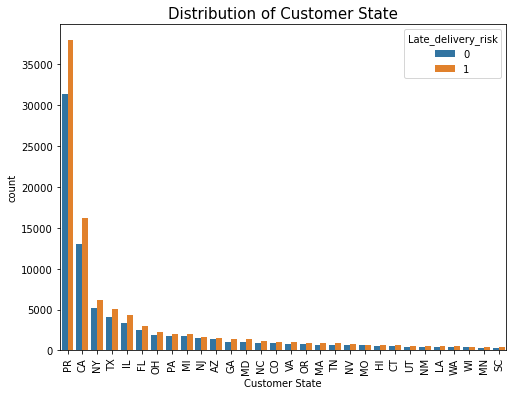

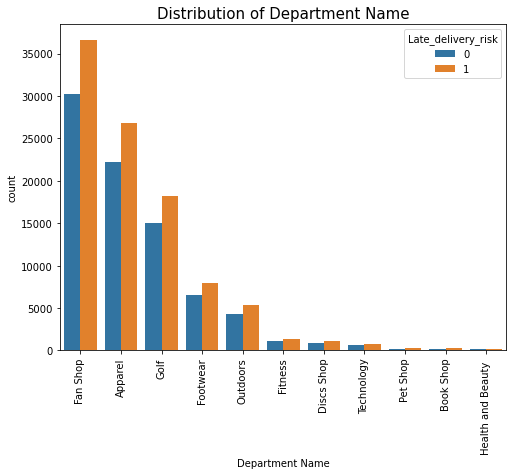

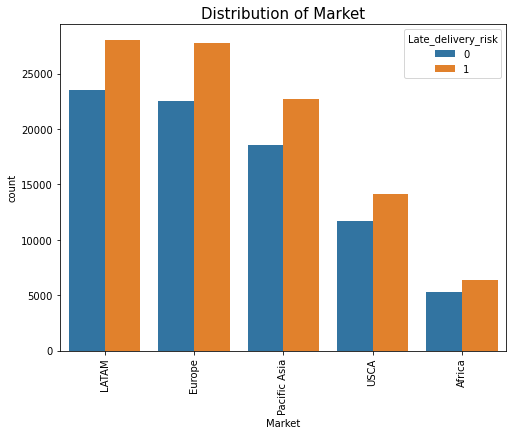

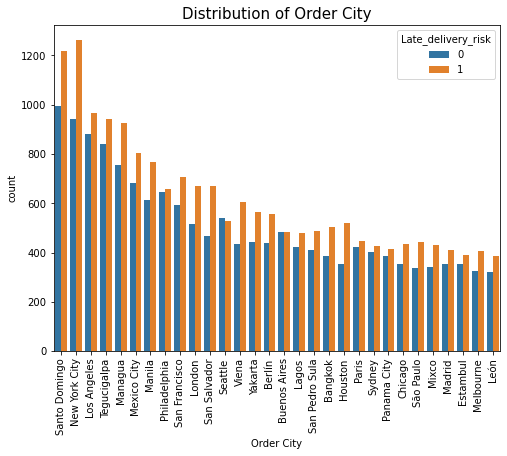

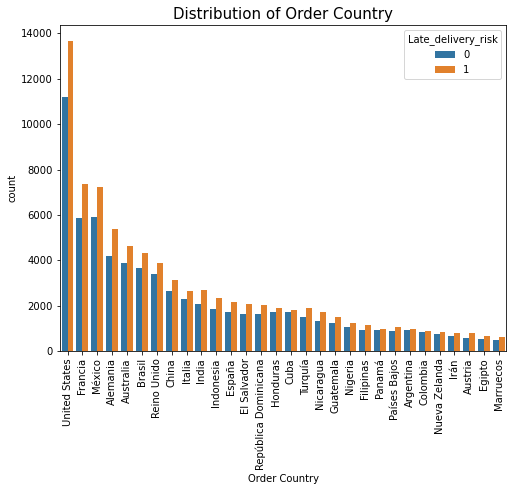

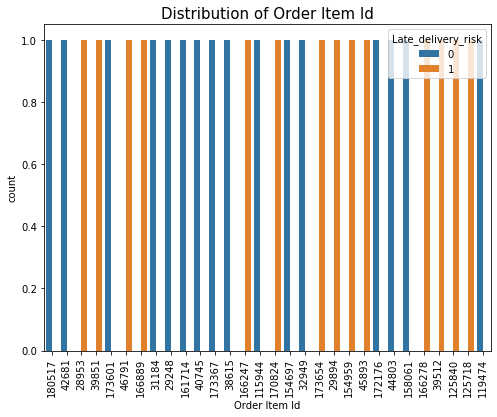

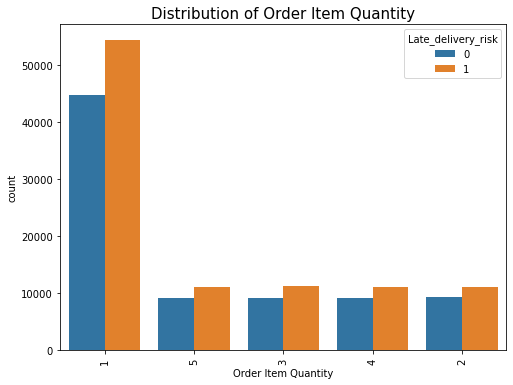

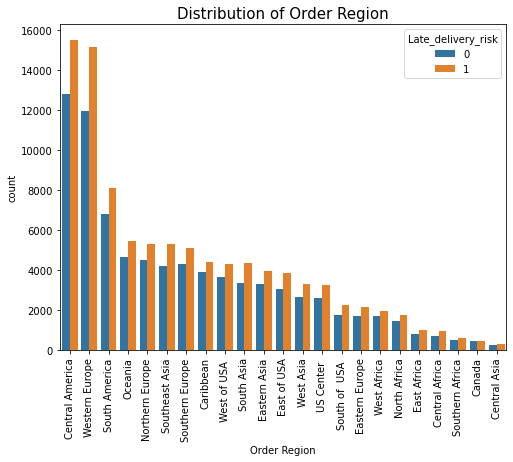

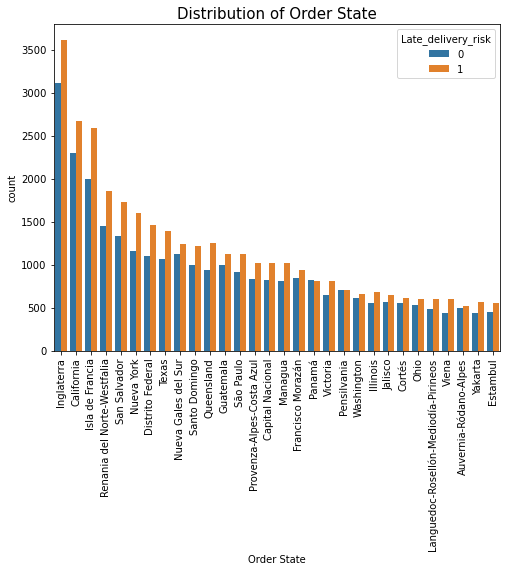

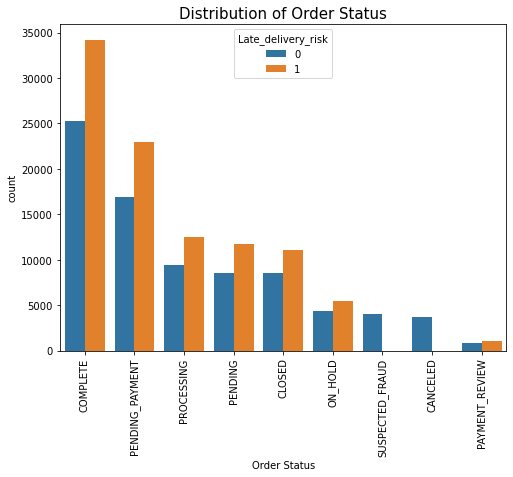

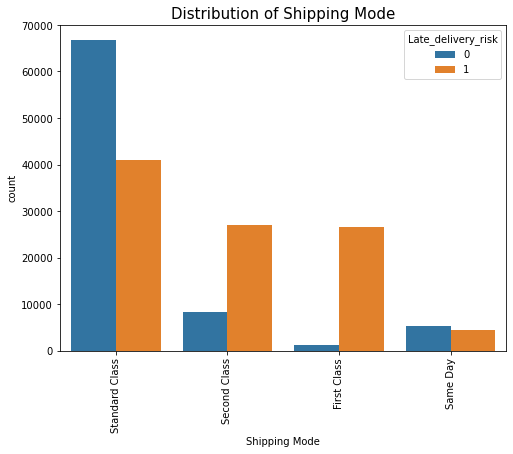

In [46]:
'''
Understand the balance of the categorical and discrete features with a countplot.
The code below will loop through each feature and illustrate the count of unique items within each feature.
Useful for understanding balance within the data.
'''
cat_disc_columns = df[['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
                      'Category Name','Customer City', 'Customer Country',
                      'Customer Id', 'Customer Segment', 'Customer State', 'Department Name',
                      'Market', 'Order City', 'Order Country', 'Order Item Id', 'Order Item Quantity',
                      'Order Region', 'Order State', 'Order Status', 'Shipping Mode']]

for col in cat_disc_columns:
    plt.figure(figsize=(8,6))
    sns.countplot(x=df[col], order = df[col].value_counts().iloc[:30].index, hue = df['Late_delivery_risk'])
    plt.title("Distribution of {}".format(col), fontsize=15) 
    plt.xticks(fontsize=10, rotation = 90) 
    plt.yticks(fontsize=10)
    plt.show()


Text(0.5, 1.0, 'Initial Correlation Heatmap of Supply Chain Dataset')

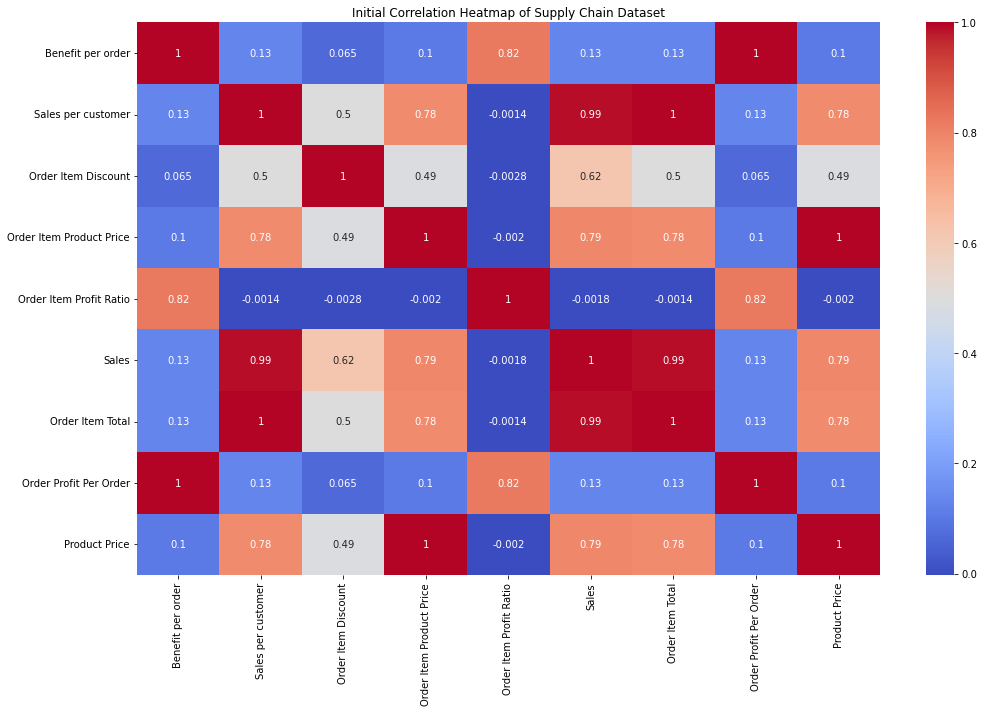

In [47]:
'''
Display a correlation heatmap for sales. Utilize sns.heatmap() to generate the figure.
'''
# Calculate the correlation coefficient with corr().
correlation_number = cont_columns.corr()

# Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(15,10), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Initial Correlation Heatmap of Supply Chain Dataset')

Multicollinearity is present for Benefit per order and Order profit per order, Sales per Customer and Order
Item Total, Sales per Customer and Sales, Order Item Product Price and Product Price, Order Item Profit Ratio and
Benefit per Order.

Text(0.5, 1.0, 'Initial Correlation Heatmap of Supply Chain Dataset')

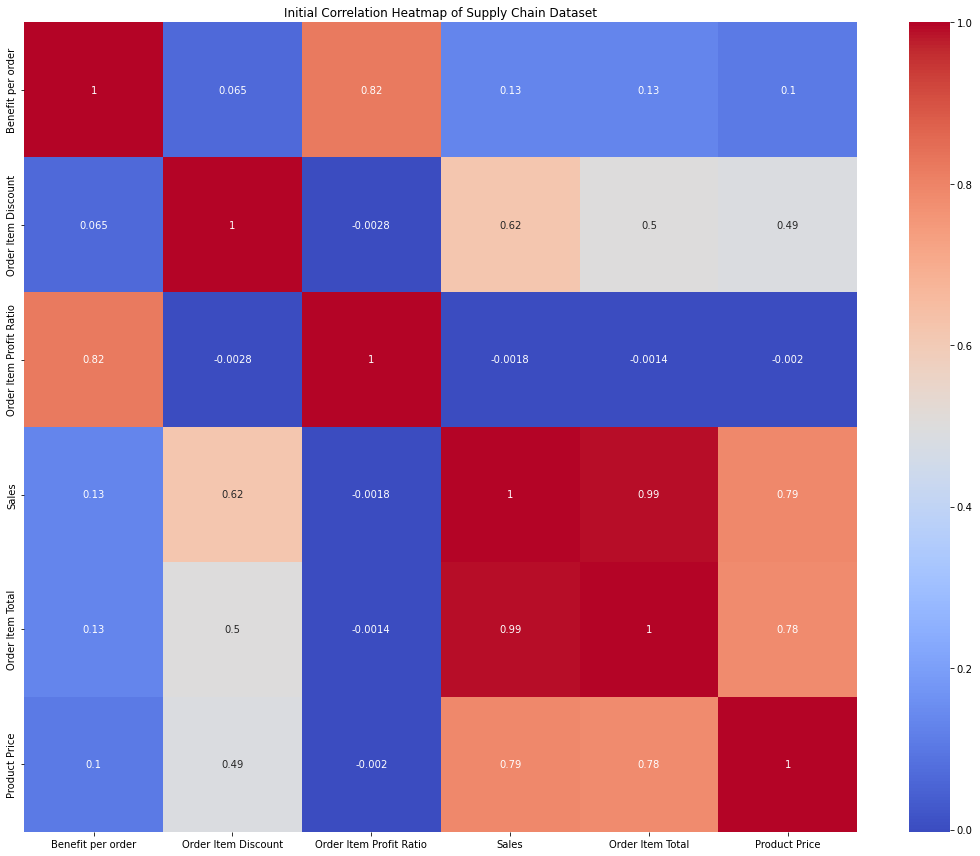

In [48]:
'''
Display a correlation heatmap for sales. Utilize sns.heatmap() to generate the figure.
'''
revised_cont_df = cont_columns[['Benefit per order', 'Order Item Discount',
                                'Order Item Profit Ratio','Sales', 'Order Item Total', 'Product Price']]

## Calculate the correlation coefficient with corr().
correlation_number = revised_cont_df.corr()

## Create the heatmap for the correlation coefficients calculated above.
fig, ax = plt.subplots(1, 1, figsize=(15,12), tight_layout = True)
sns.heatmap(correlation_number, annot = True, cmap = 'coolwarm')
plt.title('Initial Correlation Heatmap of Supply Chain Dataset')

In [49]:
'''
Check pointbiserial correlations for late delivery.
'''
# Calculate the correlation coefficient for features with potability.
correlation_number_pb1 = pointbiserialr(df['Late_delivery_risk'],df['Days for shipping (real)'])
correlation_number_pb2 = pointbiserialr(df['Late_delivery_risk'],df['Days for shipment (scheduled)'])
correlation_number_pb3 = pointbiserialr(df['Late_delivery_risk'],df['Benefit per order'])
correlation_number_pb4 = pointbiserialr(df['Late_delivery_risk'],df['Sales per customer'])
correlation_number_pb5 = pointbiserialr(df['Late_delivery_risk'],df['Order Item Discount'])
correlation_number_pb6 = pointbiserialr(df['Late_delivery_risk'],df['Order Item Product Price'])
correlation_number_pb7 = pointbiserialr(df['Late_delivery_risk'],df['Order Item Quantity'])
correlation_number_pb8 = pointbiserialr(df['Late_delivery_risk'],df['Sales'])
correlation_number_pb9 = pointbiserialr(df['Late_delivery_risk'],df['Order Item Total'])
correlation_number_pb10 = pointbiserialr(df['Late_delivery_risk'],df['Order Profit Per Order'])
correlation_number_pb11 = pointbiserialr(df['Late_delivery_risk'],df['Product Price'])

# Create a dictionary of the pointbiserial correlation values.
pb_corr_dict = {'shipping_real_corr':correlation_number_pb1, 'shipping_sched_corr':correlation_number_pb2,
                'benefits_per_order_corr':correlation_number_pb3, 'sales_per_customer_corr':correlation_number_pb4, 
                'order_item_discount_corr':correlation_number_pb5, 'order_item_prod_price_corr':correlation_number_pb6,
                'order_item_quantity_corr':correlation_number_pb7, 'sales_corr':correlation_number_pb8,
                'order_item_total_corr':correlation_number_pb9, 'order_profit_per_order_corr':correlation_number_pb10,
                'product_price':correlation_number_pb11}
pb_corr_dict

{'shipping_real_corr': PointbiserialrResult(correlation=0.4014149301112235, pvalue=0.0),
 'shipping_sched_corr': PointbiserialrResult(correlation=-0.36935177196333274, pvalue=0.0),
 'benefits_per_order_corr': PointbiserialrResult(correlation=-0.003726996128802091, pvalue=0.11330685388058316),
 'sales_per_customer_corr': PointbiserialrResult(correlation=-0.003791261522631677, pvalue=0.10722159451928712),
 'order_item_discount_corr': PointbiserialrResult(correlation=-0.0007499082512339258, pvalue=0.7500182399255557),
 'order_item_prod_price_corr': PointbiserialrResult(correlation=-0.0021752490565457114, pvalue=0.3553799904919728),
 'order_item_quantity_corr': PointbiserialrResult(correlation=-0.00013923280125809182, pvalue=0.9528277237121991),
 'sales_corr': PointbiserialrResult(correlation=-0.0035643605069127257, pvalue=0.12992366474644568),
 'order_item_total_corr': PointbiserialrResult(correlation=-0.003791261522631677, pvalue=0.10722159451928712),
 'order_profit_per_order_corr': Poin

In [50]:
'''
Sort the dictionary by correlation value.
'''
sorted_dict = sorted(pb_corr_dict.items(), key = operator.itemgetter(1))
sorted_dict

[('shipping_sched_corr',
  PointbiserialrResult(correlation=-0.36935177196333274, pvalue=0.0)),
 ('sales_per_customer_corr',
  PointbiserialrResult(correlation=-0.003791261522631677, pvalue=0.10722159451928712)),
 ('order_item_total_corr',
  PointbiserialrResult(correlation=-0.003791261522631677, pvalue=0.10722159451928712)),
 ('benefits_per_order_corr',
  PointbiserialrResult(correlation=-0.003726996128802091, pvalue=0.11330685388058316)),
 ('order_profit_per_order_corr',
  PointbiserialrResult(correlation=-0.003726996128802091, pvalue=0.11330685388058316)),
 ('sales_corr',
  PointbiserialrResult(correlation=-0.0035643605069127257, pvalue=0.12992366474644568)),
 ('order_item_prod_price_corr',
  PointbiserialrResult(correlation=-0.0021752490565457114, pvalue=0.3553799904919728)),
 ('product_price',
  PointbiserialrResult(correlation=-0.0021752490565457114, pvalue=0.3553799904919728)),
 ('order_item_discount_corr',
  PointbiserialrResult(correlation=-0.0007499082512339258, pvalue=0.7500

Text(0.5, 1.0, 'Correlation of Features with Late Delivery')

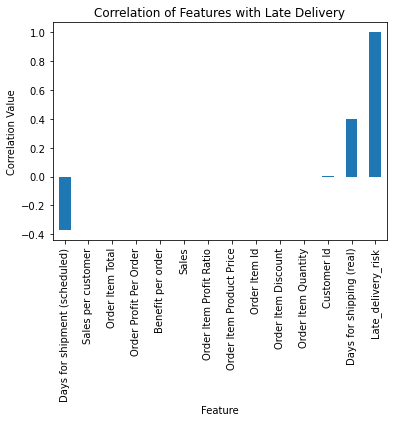

In [51]:
'''
Create a visual to show which features are most correlated with Late Delivery.
'''
df.corr()['Late_delivery_risk'][:-1].sort_values().plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Correlation Value")
plt.title("Correlation of Features with Late Delivery")

### Highlights for Multivariate Analysis: 
<ul>
    <li> Sales have a strong direct correlation with Product Price, Discount, and Order Item Total.
    <li> Multicollinearity is present within the features of the data set.
    <li> Days for shipment (scheduled) has a strong inverse correlation with Late Delivery.
    <li> Days for shipping (real) has a strong direct correlation with Late Delivery.
    <li> Late Delivery appears to be a systematic issue evident in on-time and late-deliveries for all categories. 
    <li> It may be beneficial to understand ratio of Late Delivery Risk for different categories during feature engineering.
<ul>

### More Exploratory Data Analysis (EDA)

Interested in further evaluating variable relationships, time trends, and geographical trends in this section.

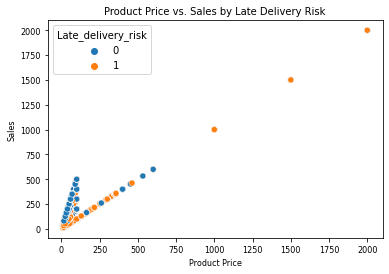

In [52]:
'''
Generate scatter plot showing relationship between Product Price and Sales.
'''
sns.scatterplot(x='Product Price', y='Sales', data=df, hue = df['Late_delivery_risk'])
plt.title("Product Price vs. Sales by Late Delivery Risk", fontsize=10)
plt.xlabel("Product Price", fontsize=8)
plt.ylabel("Sales", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

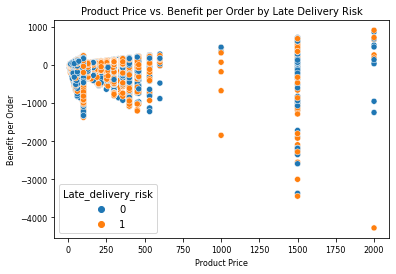

In [53]:
'''
Generate scatter plot showing relationship between Product Price and Benefit per Order.
'''
sns.scatterplot(x='Product Price', y='Benefit per order', data=df, hue = df['Late_delivery_risk'])
plt.title("Product Price vs. Benefit per Order by Late Delivery Risk", fontsize=10)
plt.xlabel("Product Price", fontsize=8)
plt.ylabel("Benefit per Order", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

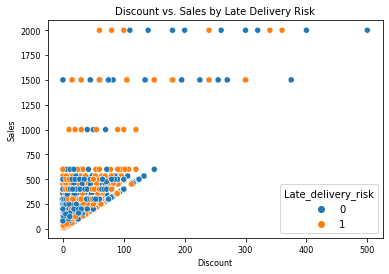

In [54]:
'''
Generate scatter plot showing relationship between Discount Value and Sales.
'''
sns.scatterplot(x='Order Item Discount', y='Sales', data=df, hue = df['Late_delivery_risk'])
plt.title("Discount vs. Sales by Late Delivery Risk", fontsize=10)
plt.xlabel("Discount", fontsize=8)
plt.ylabel("Sales", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

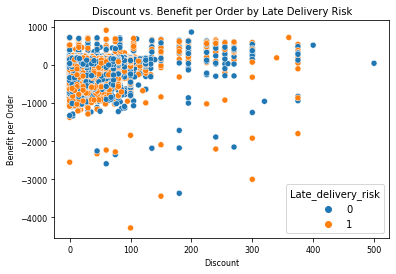

In [55]:
'''
Generate scatter plot showing relationship between Discount value and Benefit per order.
'''
sns.scatterplot(x='Order Item Discount', y='Benefit per order', data=df, hue = df['Late_delivery_risk'])
plt.title("Discount vs. Benefit per Order by Late Delivery Risk", fontsize=10)
plt.xlabel("Discount", fontsize=8)
plt.ylabel("Benefit per Order", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

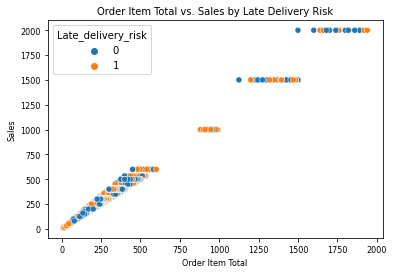

In [56]:
'''
Generate scatter plot showing relationship between Order Item Total and Sales.
'''
sns.scatterplot(x='Order Item Total', y='Sales', data=df, hue = df['Late_delivery_risk'])
plt.title("Order Item Total vs. Sales by Late Delivery Risk", fontsize=10)
plt.xlabel("Order Item Total", fontsize=8)
plt.ylabel("Sales", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

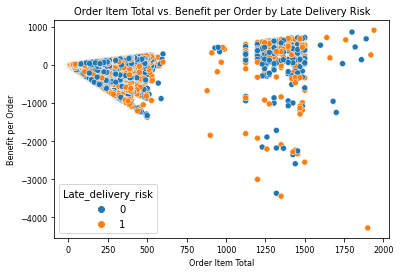

In [57]:
'''
Generate scatter plot showing relationship between Order Item Total and Benefit per Order.
'''
sns.scatterplot(x='Order Item Total', y='Benefit per order', data=df, hue = df['Late_delivery_risk'])
plt.title("Order Item Total vs. Benefit per Order by Late Delivery Risk", fontsize=10)
plt.xlabel("Order Item Total", fontsize=8)
plt.ylabel("Benefit per Order", fontsize=8)
plt.suptitle('')
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.show()

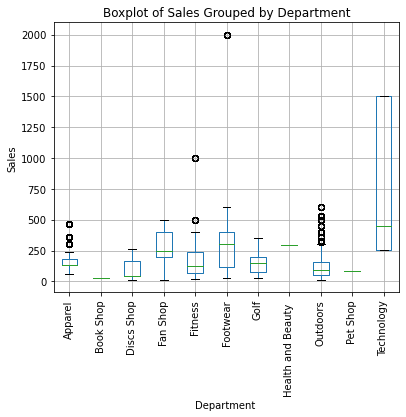

In [58]:
'''
Generate boxplot showing Sale grouped by Department.
'''
df.boxplot(column = 'Sales', by = 'Department Name', figsize=(6,5))
plt.title("Boxplot of Sales Grouped by Department", fontsize=12)
plt.xlabel("Department ", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

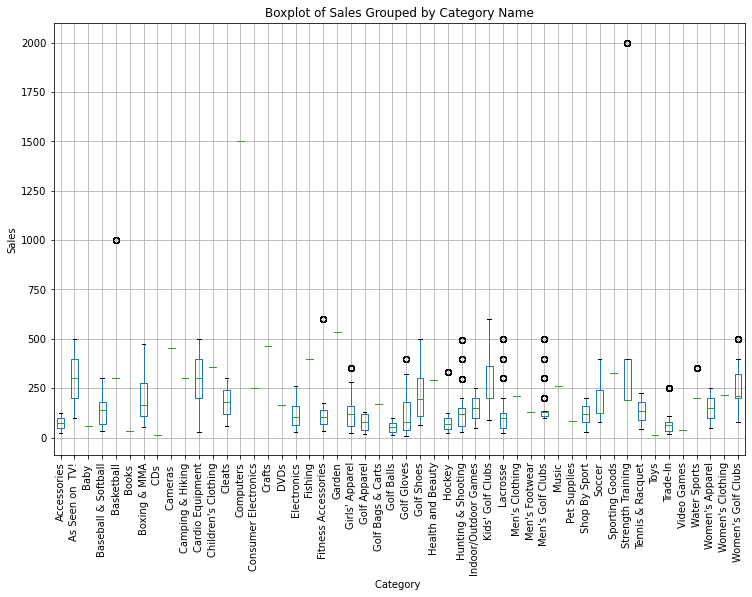

In [59]:
'''
Generate boxplot of Sales grouped by Category Name.
'''
df.boxplot(column = 'Sales', by = 'Category Name', figsize=(12,8))
plt.title("Boxplot of Sales Grouped by Category Name", fontsize=12)
plt.xlabel("Category ", fontsize=10)
plt.ylabel("Sales", fontsize=10)
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [60]:
'''
Group Customer Id by Benefit per order to provide insights into order profits (high).
'''
group_by_customer_sales = df.groupby(['Customer Id'])['Benefit per order'].mean().sort_values(ascending = False)
group_by_customer_sales[:10]

Customer Id
14111    720.299988
14221    720.000000
14239    720.000000
14254    712.950012
14089    708.750000
14237    705.599976
14255    705.599976
14095    705.000000
14362    698.400024
14110    698.400024
Name: Benefit per order, dtype: float64

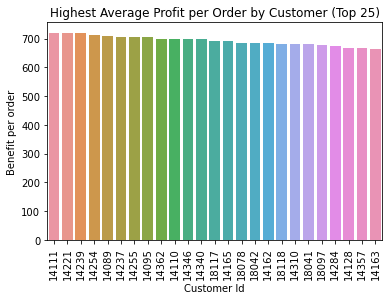

In [61]:
'''
Generate bar chart showing average profits by customer. (high)
'''
sns.barplot(x='Customer Id', y='Benefit per order', data = df,
            order = group_by_customer_sales.iloc[:25].index)
plt.title('Highest Average Profit per Order by Customer (Top 25)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [62]:
'''
Group Customer Id by Benefit per order to provide insights into order profits (low).
'''
group_by_customer_sales1 = df.groupby(['Customer Id'])['Benefit per order'].mean().sort_values(ascending = True)
group_by_customer_sales1[:10]

Customer Id
14086   -3442.50
18109   -3366.00
14313   -3000.00
18061   -2592.00
14113   -2550.00
14090   -2351.25
14398   -2328.00
14306   -2280.00
14236   -2255.25
14271   -2232.00
Name: Benefit per order, dtype: float64

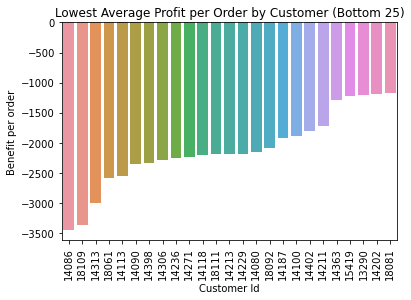

In [63]:
'''
Generate bar chart showing average profits by customer (low).
'''
sns.barplot(x='Customer Id', y='Benefit per order', data = df,
            order = group_by_customer_sales1.iloc[:25].index)
plt.title('Lowest Average Profit per Order by Customer (Bottom 25)')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [64]:
'''
Group Category Name by Benefit per order to provide insights into order profits (high).
'''
group_by_category_sales = df.groupby(['Category Name'])['Benefit per order'].mean().sort_values(ascending = False)
group_by_category_sales[:10]

Category Name
Computers               157.594593
Garden                   69.097128
Crafts                   52.750351
Cameras                  51.165203
Fishing                  43.649106
Children's Clothing      41.684202
Sporting Goods           35.066135
Music                    33.263410
Camping & Hiking         31.135230
Consumer Electronics     30.680742
Name: Benefit per order, dtype: float64

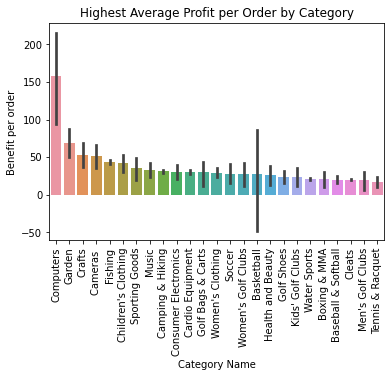

In [65]:
'''
Generate bar chart showing average profits by category (high).
'''
sns.barplot(x='Category Name', y='Benefit per order', data = df,
            order = group_by_category_sales.iloc[:25].index)
plt.title('Highest Average Profit per Order by Category')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [66]:
'''
Group Category Name by Benefit per order to provide insights into order profits (low).
'''
group_by_category_sales1 = df.groupby(['Category Name'])['Benefit per order'].mean().sort_values(ascending = True)
group_by_category_sales1[:10]

Category Name
CDs                  1.416421
Toys                 1.702665
Books                2.180272
Strength Training    2.993785
Video Games          3.242864
Golf Balls           5.656047
Pet Supplies         7.295244
Baby                 7.367295
Golf Apparel         7.928141
Trade-In             8.126663
Name: Benefit per order, dtype: float64

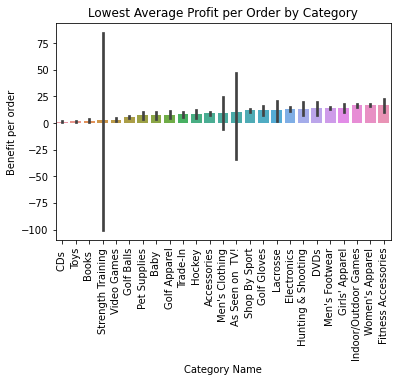

In [67]:
'''
Generate bar chart showing average profits by category (low).
'''
sns.barplot(x='Category Name', y='Benefit per order', data = df,
            order = group_by_category_sales1.iloc[:25].index)
plt.title('Lowest Average Profit per Order by Category')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [68]:
'''
Group Deparment Name by Benefit per order to provide insights into order profits.
'''
group_by_department_sales = df.groupby(['Department Name'])['Benefit per order'].mean().sort_values(ascending = False)
group_by_department_sales

Department Name
Technology            77.249154
Footwear              28.242513
Fan Shop              27.432366
Health and Beauty     26.225497
Fitness               18.772917
Apparel               17.998345
Outdoors              14.996021
Golf                  14.976627
Discs Shop            11.941323
Pet Shop               7.295244
Book Shop              2.180272
Name: Benefit per order, dtype: float64

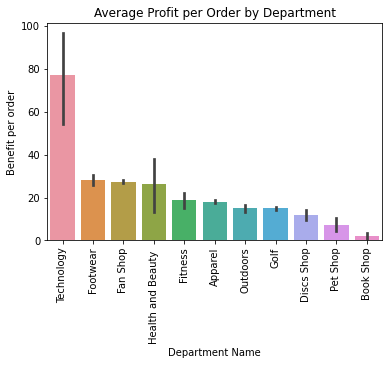

In [69]:
'''
Generate bar chart showing average profits by department.
'''
sns.barplot(x='Department Name', y='Benefit per order', data = df,
            order = group_by_department_sales.index)
plt.title('Average Profit per Order by Department')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [70]:
'''
Group Order Country by Benefit per order to provide insights into order profits (high).
'''
group_by_order_country_sales= df.groupby(['Order Country'])['Benefit per order'].mean().sort_values(ascending = False)
group_by_order_country_sales[:10]

Order Country
Burundi              77.750000
Montenegro           74.347272
Kuwait               66.915001
Suazilandia          62.492001
Guinea Ecuatorial    51.680001
Macedonia            49.575001
Luxemburgo           48.313000
Mauritania           48.156191
Eritrea              46.240000
Botsuana             46.174616
Name: Benefit per order, dtype: float64

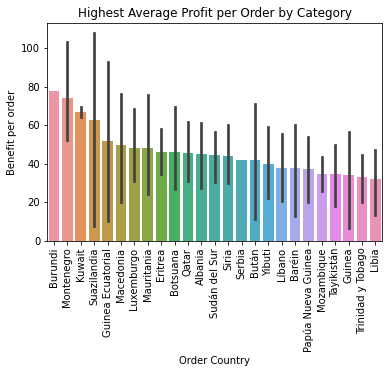

In [71]:
'''
Generate bar chart showing average profits by country (high).
'''
sns.barplot(x='Order Country', y='Benefit per order', data = df,
            order = group_by_order_country_sales.iloc[:25].index)
plt.title('Highest Average Profit per Order by Category')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [72]:
'''
Group Order Country by Benefit per order to provide insights into order profits (low).
'''
group_by_order_country_sales1 = df.groupby(['Order Country'])['Benefit per order'].mean().sort_values(ascending = True)
group_by_order_country_sales1[:10]

Order Country
Chad                   -90.903331
República de Gambia    -53.166000
Guinea-Bissau          -51.740000
Taiwán                 -47.397932
Guayana Francesa       -25.764445
Belice                 -17.565385
Sáhara Occidental       -8.760000
Bosnia y Herzegovina    -7.275112
Ruanda                  -3.837443
Mongolia                -3.623164
Name: Benefit per order, dtype: float64

In [73]:
'''
Show Top 10 Sales by Country.
'''
df_sales_country=df.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

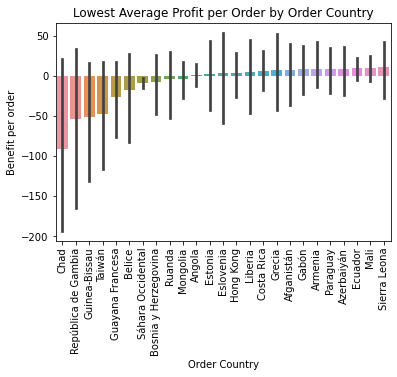

In [74]:
'''
Generate bar chart showing average profits by Order Country (low).
'''
sns.barplot(x='Order Country', y='Benefit per order', data = df,
            order = group_by_order_country_sales1.iloc[:25].index)
plt.title('Lowest Average Profit per Order by Order Country')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [75]:
'''
Group Order Region by Benefit per order to provide insights into order profits (high).
'''
group_by_order_region_sales = df.groupby(['Order Region'])['Benefit per order'].mean().sort_values(ascending = False)
group_by_order_region_sales[:10]

Order Region
Southern Africa    26.643086
Canada             24.922534
Southern Europe    24.475584
Northern Europe    23.840952
Central Asia       23.590018
East Africa        23.308709
Western Europe     23.071529
East of USA        22.597730
South America      22.440870
US Center          22.268427
Name: Benefit per order, dtype: float64

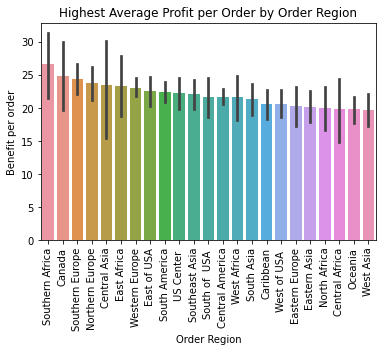

In [76]:
'''
Generate bar chart showing average profits by Order Country (high).
'''
sns.barplot(x='Order Region', y='Benefit per order', data = df,
            order = group_by_order_region_sales.iloc[:25].index)
plt.title('Highest Average Profit per Order by Order Region')
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [77]:
'''
Create variables for the order year, month, week day, hour and month/year.
'''
df['order_year']= pd.DatetimeIndex(df['order date (DateOrders)']).year
df['order_month'] = pd.DatetimeIndex(df['order date (DateOrders)']).month
df['order_week_day'] = pd.DatetimeIndex(df['order date (DateOrders)']).weekday
df['order_hour'] = pd.DatetimeIndex(df['order date (DateOrders)']).hour
df['order_month_year'] = pd.to_datetime(df['order date (DateOrders)']).dt.to_period('M')

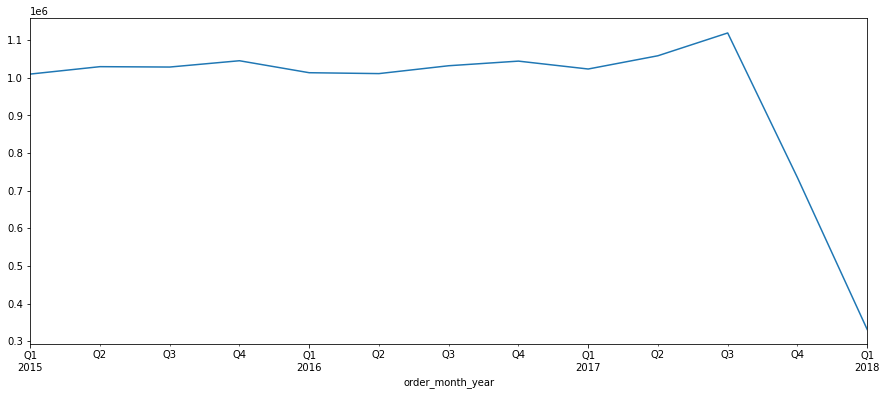

In [78]:
'''
Plot the Sales based on order Quarter/Year.
'''
quarter= df.groupby('order_month_year')
quarter_sales=quarter['Sales'].sum().resample('Q').mean().plot(figsize=(15,6))

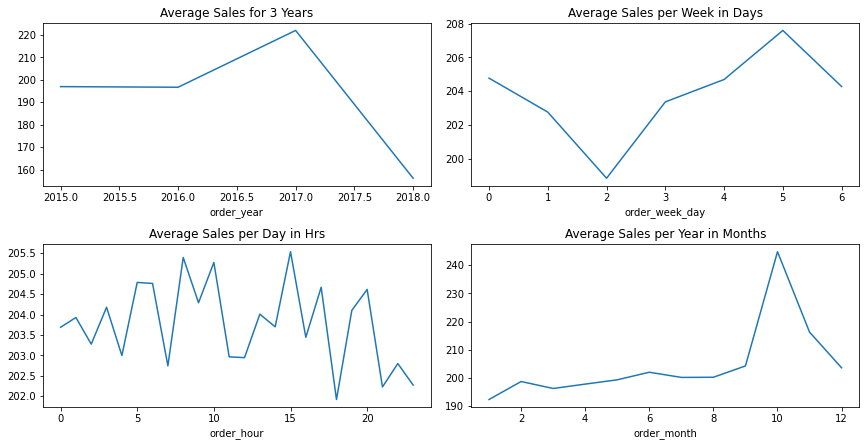

In [79]:
'''
Determine if Sales are trending differently across years, week days, time of the day, or certain months (by order date).
'''
plt.figure(figsize=(10,12))
plt.subplot(4, 2, 1)
quarter= df.groupby('order_year')
quarter['Sales'].mean().plot(figsize=(12,12),title='Average Sales for 3 Years')
plt.subplot(4, 2, 2)
days=df.groupby("order_week_day")
days['Sales'].mean().plot(figsize=(12,12),title='Average Sales per Week in Days')
plt.subplot(4, 2, 3)
hours=df.groupby("order_hour")
hours['Sales'].mean().plot(figsize=(12,12),title='Average Sales per Day in Hrs')
plt.subplot(4, 2, 4)
month_v=df.groupby("order_month")
month_v['Sales'].mean().plot(figsize=(12,12),title='Average Sales per Year in Months')
plt.tight_layout()
plt.show()

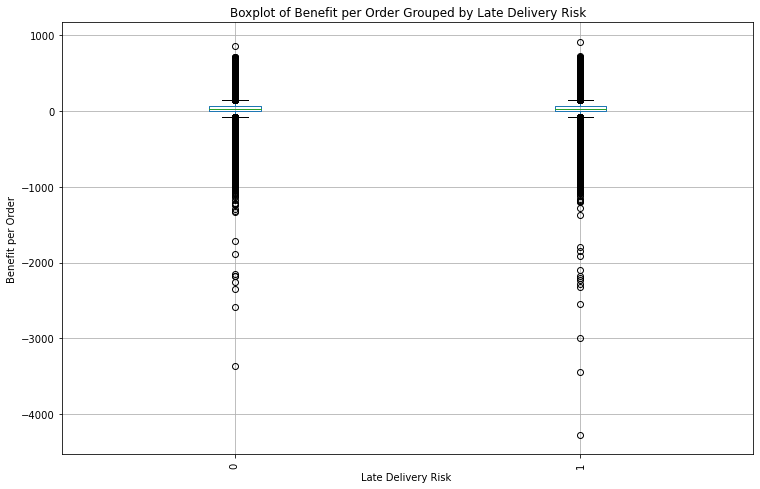

In [80]:
'''
Generate a boxplot of Benefit per Order by Late Delivery Risk.
'''
df.boxplot(column = 'Benefit per order', by = 'Late_delivery_risk', figsize=(12,8))
plt.title("Boxplot of Benefit per Order Grouped by Late Delivery Risk", fontsize=12)
plt.xlabel("Late Delivery Risk ", fontsize=10)
plt.ylabel("Benefit per Order", fontsize=10)
plt.suptitle('')
plt.xticks(fontsize=10, rotation = 90)
plt.yticks(fontsize=10) 
plt.show()

In [81]:
'''
Show geographic locations of order countries.
'''
geo_df = df.groupby(['Order Country'])['Benefit per order'].count().reset_index(name='total order').sort_values(by='total order',
                                                                                                                ascending=True)
fig = px.choropleth(geo_df ,  locationmode='country names', locations='Order Country',
                    color='total order',hover_name='Order Country')
fig.show()  

In [82]:
'''
Show geographic locations of order countriesby Late Delivery Risk.
'''
geo_df = df.groupby(['Order Country'])['Late_delivery_risk'].count().reset_index(name='Late_delivery_risk').sort_values(by='Late_delivery_risk',
                                                                                                                ascending=True)
fig = px.choropleth(geo_df ,  locationmode='country names', locations='Order Country',
                    color='Late_delivery_risk',hover_name='Order Country')
fig.show()  

In [83]:
'''
Show geographic locations of customer countries.
'''
geo_df2 = df.groupby(['Customer Country'])['Benefit per order'].count().reset_index(name='total order').sort_values(by='total order',
                                                                                                                ascending=True)
fig = px.choropleth(geo_df2 ,  locationmode='country names', locations='Customer Country',
                    color='total order',hover_name='Customer Country')
fig.show()  

In [84]:
'''
Try creating a feature for difference in days from shipping date from order date.
'''
df['delta_days_processing'] = df['shipping date (DateOrders)'] - df['order date (DateOrders)']

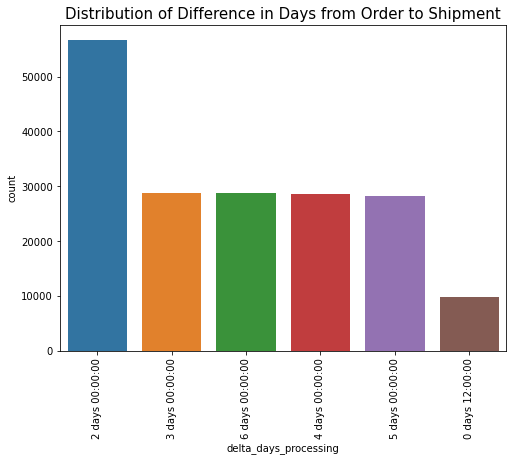

In [85]:
'''
Show count of delta in days from order placement to shipment.
'''
plt.figure(figsize=(8,6))
sns.countplot(x=df['delta_days_processing'], order = df['delta_days_processing'].value_counts().iloc[:30].index)
plt.title("Distribution of Difference in Days from Order to Shipment", fontsize=15) 
plt.xticks(fontsize=10, rotation = 90) 
plt.yticks(fontsize=10)
plt.show()

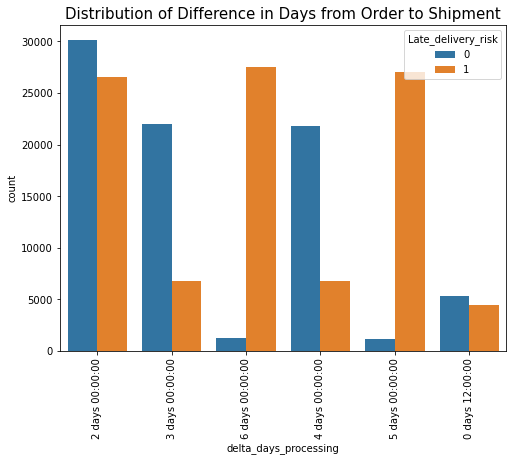

In [86]:
'''
Show count of delta in days from order placement to shipment with late delivery breakdown.
'''
plt.figure(figsize=(8,6))
sns.countplot(x=df['delta_days_processing'], order = df['delta_days_processing'].value_counts().iloc[:30].index, hue = df['Late_delivery_risk'])
plt.title("Distribution of Difference in Days from Order to Shipment", fontsize=15) 
plt.xticks(fontsize=10, rotation = 90) 
plt.yticks(fontsize=10)
plt.show()

In [87]:
'''
Try creating a feature for difference in days actual vs scheduled shipping days.
'''
df['delta_days_shipping'] = df['Days for shipment (scheduled)'] - df['Days for shipping (real)']

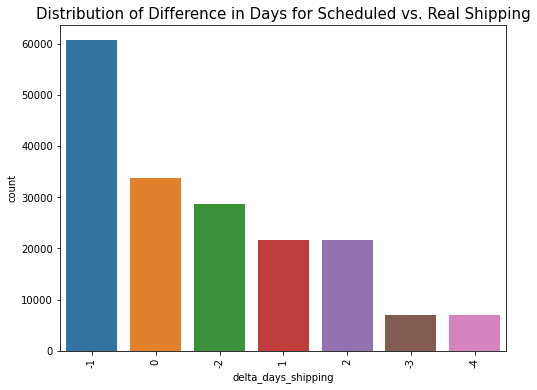

In [88]:
'''
Show count of delta in days from scheduled vs. actual shipping days.
'''
plt.figure(figsize=(8,6))
sns.countplot(x=df['delta_days_shipping'], order = df['delta_days_shipping'].value_counts().iloc[:30].index)
plt.title("Distribution of Difference in Days for Scheduled vs. Real Shipping", fontsize=15) 
plt.xticks(fontsize=10, rotation = 90) 
plt.yticks(fontsize=10)
plt.show()

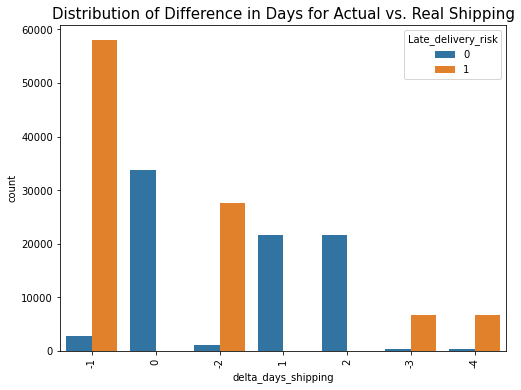

In [89]:
'''
Show count of delta in days from scheduled vs. actual shipping days with Late Delivery Breakdown.
'''
plt.figure(figsize=(8,6))
sns.countplot(x=df['delta_days_shipping'], order = df['delta_days_shipping'].value_counts().iloc[:30].index, hue = df['Late_delivery_risk'])
plt.title("Distribution of Difference in Days for Actual vs. Real Shipping", fontsize=15) 
plt.xticks(fontsize=10, rotation = 90) 
plt.yticks(fontsize=10)
plt.show()

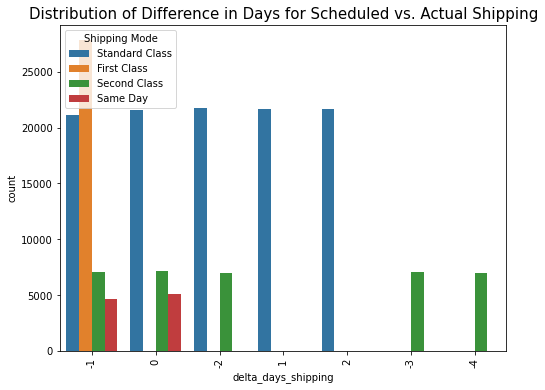

In [90]:
'''
Show Shipping Mode by difference in days from scheduled vs. actual shipping time. 
'''
plt.figure(figsize=(8,6))
sns.countplot(x=df['delta_days_shipping'], order = df['delta_days_shipping'].value_counts().iloc[:30].index, hue = df['Shipping Mode'])
plt.title("Distribution of Difference in Days for Scheduled vs. Actual Shipping", fontsize=15) 
plt.xticks(fontsize=10, rotation = 90) 
plt.yticks(fontsize=10)
plt.show()

Text(0.5, 1.0, 'Correlation of Features with Late Delivery')

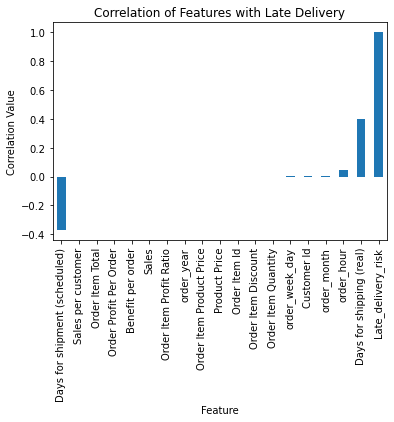

In [91]:
'''
Create a visual to show which features are most correlated with Late Delivery.
'''
df.corr()['Late_delivery_risk'][:-1].sort_values().plot(kind='bar')
plt.xlabel("Feature")
plt.ylabel("Correlation Value")
plt.title("Correlation of Features with Late Delivery")

### Highlights for More Exploratory Data Analysis (EDA):
<ul>
    <li> Most sales came from the technology department during this timeframe (2015-2018).
    <li> Technology had the most average profit per order compared to other departments. (around \$77.25)
    <li> Computers had the most average profit per order compared to other categories. (around \$158.00)
    <li> The Book Shop department had the lowest average profit per order. (around \$2.18)
    <li> CD's where the lowest average profit per order compared to other categories. (around \$1.41)
    <li> Average sales went up from 2015-2017, but then declined from 2017-2018.
    <li> Most orders are coming in from the United States, but orders are coming in from around the world.
    <li> Late delivieries does not appear to be impacting profits per order.
    <li> Feature was generated for delta days for processing which was calculated from the difference in days when the order was placed and when the order was shipped. Most late deliveries are present when it takes 5 or 6 days of processing.
    <li> Feature was generated for the delta days between scheduled vs. actual shipping days. It is most often taking an extra day to ship than scheduled resulting in a lot of late deliveries.
    <li> All shipping modes are used for the orders that took a day extra to deliver. Only Standard and Second Class shipping modes were used for orders that took longer than an extra day to be delivered. Orders arriving early where only shipped Standard.
    <li> Days for shipment (scheduled) and ship_hour are indirectly correlated with late delivery risk.
    <li> Days for shipping (real) and order hour are the strongest direct correlations with late delivery risk.
<ul>

## 3) Data Preparation

This section focuses on the data preparation steps prior to training/testing a predictive model. After consideration of removal of outliers outside of the IQR (+/- 1.5sigma), it was decided to leave all remaining records in the data set for training and testing. Sales will have some outliers that may need to be considered periodically, so this will reflect closer to expected results for future sales. However, the suspected fraud and pending orders will be removed prior to feeding the data into the model.

In [92]:
'''
Review the current data set shape.
'''
df.shape

(180519, 41)

In [93]:
'''
Overview the existing df.
'''
df.head()

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   

   Benefit per order  Sales per customer   Delivery Status  \
0          91.250000          314.640015  Advance shipping   
1        -249.089996          311.359985     Late delivery   
2        -247.779999          309.720001  Shipping on time   
3          22.860001          304.809998  Advance shipping   
4         134.210007          298.250000  Advance shipping   

   Late_delivery_risk   Category Name Customer City Customer Country  ...  \
0                   0  Sporting Goods        Caguas      Puerto Rico  ...   
1                   1  Sporting Goods        Caguas      Puerto Rico  ...   
2                   0  Sporting Goods      San Jose    United States  ...   
3                   0  Sporting Goods   Los Angeles    United States  ...   
4                   0  Sporting Goods        Caguas      Puerto Rico  ...   

   Product Price shipping date (DateOrders)   Shipping Mode order_year  \
0         327.75        2018-02-03 22:56:00  Standard Class       2018   
1         327.75        2018-01-18 12:27:00  Standard Class       2018   
2         327.75        2018-01-17 12:06:00  Standard Class       2018   
3         327.75        2018-01-16 11:45:00  Standard Class       2018   
4         327.75        2018-01-15 11:24:00  Standard Class       2018   

  order_month order_week_day order_hour order_month_year  \
0           1              2         22          2018-01   
1           1              5         12          2018-01   
2           1              5         12          2018-01   
3           1              5         11          2018-01   
4           1              5         11          2018-01   

  delta_days_processing  delta_days_shipping  
0                3 days                    1  
1                5 days                   -1  
2                4 days                    0  
3                3 days                    1  
4                2 days                    2  

[5 rows x 41 columns]

In [94]:
'''
Show the existing columns currently in the data set.
'''
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Name', 'Market', 'Order City',
       'Order Country', 'order date (DateOrders)', 'Order Item Discount',
       'Order Item Id', 'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Product Name', 'Product Price', 'shipping date (DateOrders)',
       'Shipping Mode', 'order_year', 'order_month', 'order_week_day',
       'order_hour', 'order_month_year', 'delta_days_processing',
       'delta_days_shipping'],
      dtype='object')

In [95]:
'''
Removal of Suspected Fraud Orders data.
'''
df = df.loc[df['Order Status'] != 'SUSPECTED_FRAUD']

In [96]:
'''
Removal of Pending Orders data.
'''
df = df.loc[df['Order Status'] != 'PENDING']

Revisited the data understanding previously performed and found no major shifts or differences. I will keep the removal of the SUSPECTED_FRAUD and PENDING Order Status data at this step in the analysis. 

In [97]:
'''
Review the current data set shape after removing Suspected Fraud and Pending Orders.
'''
df.shape

(156230, 41)

### Preparation for Sales Prediction

In [98]:
'''
Create df_sales
'''
df_sales = df[['Benefit per order', 'Order Item Discount',
                                'Order Item Profit Ratio','Sales', 'Product Price']]

In [99]:
df_sales.shape

(156230, 5)

In [100]:
df_sales.head()

Benefit per order  Order Item Discount  Order Item Profit Ratio   Sales  \
0          91.250000            13.110000                     0.29  327.75   
2        -247.779999            18.030001                    -0.80  327.75   
3          22.860001            22.940001                     0.08  327.75   
4         134.210007            29.500000                     0.45  327.75   
5          18.580000            32.779999                     0.06  327.75   

   Product Price  
0         327.75  
2         327.75  
3         327.75  
4         327.75  
5         327.75

In [101]:
'''
Prior to performing any additional data preparation tasks, the data will be split into
a training and test set. Start by defining the features and target variables as X and y, respectively.
The target variable will be price and the remaining columns will be the initial features. 
'''
X = df_sales.drop('Sales', axis = 1)
y = df_sales['Sales']

In [102]:
'''
Utilize the train_test_split() function to split data into a training and test data set.
I'll be splitting the entire data set into 80% Training and 20% Test.
'''
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [103]:
'''
Understand/Verify the shape of the training and test data sets just created.
'''
print("The X_train shape is {} rows and {} columns.".format(X_train.shape[0],X_train.shape[1]))
print("The y_train shape is {} rows.".format(y_train.shape[0]))
print("The X_test shape is {} rows and {} columns.".format(X_test.shape[0],X_test.shape[1]))
print("The y_test shape is {} rows.".format(y_test.shape[0]))

The X_train shape is 124984 rows and 4 columns.
The y_train shape is 124984 rows.
The X_test shape is 31246 rows and 4 columns.
The y_test shape is 31246 rows.


In [104]:
'''
View the first 5 rows of the x_sales_train data set.
'''
X_train.head()

Benefit per order  Order Item Discount  Order Item Profit Ratio  \
112272        -326.119995            32.490002                    -1.50   
9387             9.170000            14.400000                     0.06   
65293           37.439999             5.200000                     0.30   
178848          26.959999            16.990000                     0.33   
138222        -240.110001            40.000000                    -0.67   

        Product Price  
112272      49.980000  
9387        31.990000  
65293      129.990005  
178848      49.980000  
138222     399.980011

In [105]:
'''
View the first 5 rows of the x_sales_test data set. These should match.
'''
X_test.head()

Benefit per order  Order Item Discount  Order Item Profit Ratio  \
65453           12.180000                  6.5                     0.28   
83096           80.919998                 51.0                     0.33   
175916           7.950000                  9.6                     0.11   
7264          -138.520004                 11.0                    -0.73   
25351            0.000000                  0.0                     0.00   

        Product Price  
65453       50.000000  
83096      299.980011  
175916      39.990002  
7264        99.989998  
25351       24.990000

### Preparation for Late Delivery Prediction

In [106]:
'''
Create df_late_Delivery
'''
df_ld = df[['Late_delivery_risk', 'Days for shipping (real)',
            'Days for shipment (scheduled)','Order Region',
            'Department Name', 'Category Name']]

In [107]:
'''
Split the data into training and test set, where Late Delivery is the target.
'''
X_ld = df_ld.drop('Late_delivery_risk', axis = 1)
y_ld = df_ld['Late_delivery_risk']

In [108]:
'''
Utilize the train_test_split() function to split data into a training and test data set.
I'll be splitting the entire data set into 80% Training and 20% Test.
'''
X_train_ld, X_test_ld, y_train_ld, y_test_ld = train_test_split(X_ld,y_ld, test_size = 0.3, random_state = 42)

In [109]:
'''
Understand/Verify the shape of the training and test data sets just created.
'''
print("The X_train_ld shape is {} rows and {} columns.".format(X_train_ld.shape[0],X_train_ld.shape[1]))
print("The y_train_ld shape is {} rows.".format(y_train_ld.shape[0]))
print("The X_test_ld shape is {} rows and {} columns.".format(X_test_ld.shape[0],X_test_ld.shape[1]))
print("The y_test_ld shape is {} rows.".format(y_test_ld.shape[0]))

The X_train_ld shape is 109361 rows and 5 columns.
The y_train_ld shape is 109361 rows.
The X_test_ld shape is 46869 rows and 5 columns.
The y_test_ld shape is 46869 rows.


In [110]:
'''
Create Dummy Variables for the categorical columns with first dummy variable dropped to prevent collinearity.
'''
X_train_ld = pd.get_dummies(X_train_ld, drop_first = True)
X_test_ld = pd.get_dummies(X_test_ld, drop_first = True)

In [111]:
'''
Understand/Verify the shape of the training and test data sets just created.
'''
print("The X_train_ld shape is {} rows and {} columns.".format(X_train_ld.shape[0],X_train_ld.shape[1]))
print("The X_test_ld shape is {} rows and {} columns.".format(X_test_ld.shape[0],X_test_ld.shape[1]))

The X_train_ld shape is 109361 rows and 83 columns.
The X_test_ld shape is 46869 rows and 83 columns.


In [112]:
'''
View the first 5 rows of the X_train data set.
'''
X_train_ld.head()

Days for shipping (real)  Days for shipment (scheduled)  \
126098                         4                              2   
35718                          2                              1   
5064                           4                              4   
73390                          4                              4   
31830                          4                              4   

        Order Region_Caribbean  Order Region_Central Africa  \
126098                       0                            0   
35718                        0                            0   
5064                         0                            0   
73390                        0                            0   
31830                        0                            0   

        Order Region_Central America  Order Region_Central Asia  \
126098                             0                          0   
35718                              0                          0   
5064                               0                          0   
73390                              0                          0   
31830                              1                          0   

        Order Region_East Africa  Order Region_East of USA  \
126098                         0                         0   
35718                          0                         0   
5064                           0                         0   
73390                          0                         0   
31830                          0                         0   

        Order Region_Eastern Asia  Order Region_Eastern Europe  ...  \
126098                          0                            0  ...   
35718                           0                            0  ...   
5064                            0                            0  ...   
73390                           0                            0  ...   
31830                           0                            0  ...   

        Category Name_Sporting Goods  Category Name_Strength Training  \
126098                             0                                0   
35718                              0                                0   
5064                               0                                0   
73390                              0                                0   
31830                              0                                0   

        Category Name_Tennis & Racquet  Category Name_Toys  \
126098                               0                   0   
35718                                0                   0   
5064                                 0                   0   
73390                                0                   0   
31830                                0                   0   

        Category Name_Trade-In  Category Name_Video Games  \
126098                       0                          0   
35718                        0                          0   
5064                         0                          0   
73390                        0                          0   
31830                        0                          0   

        Category Name_Water Sports  Category Name_Women's Apparel  \
126098                           0                              1   
35718                            0                              0   
5064                             0                              0   
73390                            1                              0   
31830                            0                              0   

        Category Name_Women's Clothing  Category Name_Women's Golf Clubs  
126098                               0                                 0  
35718                                0                                 0  
5064                                 0                                 0  
73390                                0                                 0  
31830                                0                

In [113]:
'''
View the first 5 rows of the X_test data set.These should match without any issues.
'''
X_test_ld.head()

Days for shipping (real)  Days for shipment (scheduled)  \
65453                          6                              2   
83096                          4                              4   
175916                         2                              1   
7264                           6                              2   
25351                          2                              1   

        Order Region_Caribbean  Order Region_Central Africa  \
65453                        0                            0   
83096                        0                            0   
175916                       0                            0   
7264                         0                            0   
25351                        0                            0   

        Order Region_Central America  Order Region_Central Asia  \
65453                              0                          0   
83096                              0                          0   
175916                             0                          0   
7264                               0                          0   
25351                              0                          0   

        Order Region_East Africa  Order Region_East of USA  \
65453                          0                         0   
83096                          0                         0   
175916                         0                         0   
7264                           0                         0   
25351                          0                         0   

        Order Region_Eastern Asia  Order Region_Eastern Europe  ...  \
65453                           0                            0  ...   
83096                           0                            0  ...   
175916                          0                            0  ...   
7264                            0                            0  ...   
25351                           0                            0  ...   

        Category Name_Sporting Goods  Category Name_Strength Training  \
65453                              0                                0   
83096                              0                                0   
175916                             0                                0   
7264                               0                                0   
25351                              0                                0   

        Category Name_Tennis & Racquet  Category Name_Toys  \
65453                                0                   0   
83096                                0                   0   
175916                               0                   0   
7264                                 0                   0   
25351                                0                   0   

        Category Name_Trade-In  Category Name_Video Games  \
65453                        0                          0   
83096                        0                          0   
175916                       0                          0   
7264                         0                          0   
25351                        0                          0   

        Category Name_Water Sports  Category Name_Women's Apparel  \
65453                            0                              1   
83096                            0                              0   
175916                           0                              0   
7264                             0                              0   
25351                            0                              0   

        Category Name_Women's Clothing  Category Name_Women's Golf Clubs  
65453                                0                                 0  
83096                                0                                 0  
175916                               0                                 0  
7264                                 0                                 0  
25351                                0                

### Highlights for Data Preparation:
<ul>
    <li> Removed records with Order Status equal to SUSPTECTED FRAUD and PENDING.
    <li> Used Train, Test method to split data into 80% Training and 20% Testing subsets for Sales Models.
    <li> Prepared df_sales for Sales Forecasting Models.
    <li> Used Train, Test method to split data into 70% Training and 30% Testing subsets for Sales Models
    <li> Prepared df_ld for Late Delivery Prediction Models.  
<ul>

## 4) Predictive Modeling

### Predictive Model for Sales Forecasting - Linear Regression

In [114]:
'''
Create a Linear Regression Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
model_lr_prediction_train = model_lr.predict(X_train)

In [115]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
lr_mae = mean_absolute_error(y_test, model_lr_prediction)
lr_mse = mean_squared_error(y_test, model_lr_prediction)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, model_lr_prediction)
lr_r2_train = r2_score(y_train, model_lr_prediction_train)
print("MAE of the Linear Regression Model is:", round(lr_mae,4))
print("MSE of the Linear Regression Model is:", round(lr_mse,4))
print("RMSE of the Linear Regression Model is:", round(lr_rmse,4))
print("R2 Score of the Linear Regression Model on Test Data is:", round(lr_r2,4))
print("R2 Score of the Linear Regression Model on Train Data is:", round(lr_r2_train,4))

MAE of the Linear Regression Model is: 54.9142
MSE of the Linear Regression Model is: 5237.4988
RMSE of the Linear Regression Model is: 72.3706
R2 Score of the Linear Regression Model on Test Data is: 0.6983
R2 Score of the Linear Regression Model on Train Data is: 0.7047


### Predictive Model for Sales Forecasting - Lasso Regression

In [116]:
'''
Create a Lasso Regression Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_lasso = Lasso()
model_lasso.fit(X_train, y_train)
model_lasso_prediction = model_lasso.predict(X_test)
model_lasso_prediction_train = model_lasso.predict(X_train)

In [117]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
lasso_mae = mean_absolute_error(y_test, model_lasso_prediction)
lasso_mse = mean_squared_error(y_test, model_lasso_prediction)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, model_lasso_prediction)
lasso_r2_train = r2_score(y_train, model_lasso_prediction_train)
print("MAE of the Lasso Regression Model is:", round(lasso_mae,4))
print("MSE of the Lasso Regression Model is:", round(lasso_mse,4))
print("RMSE of the Lasso Regression Model is:", round(lasso_rmse,4))
print("R2 Score of the Lasso Regression Model on Test Data is:", round(lasso_r2,4))
print("R2 Score of the Lasso Regression Model on Train Data is:", round(lasso_r2_train,4))

MAE of the Lasso Regression Model is: 55.2038
MSE of the Lasso Regression Model is: 5235.6336
RMSE of the Lasso Regression Model is: 72.3577
R2 Score of the Lasso Regression Model on Test Data is: 0.6984
R2 Score of the Lasso Regression Model on Train Data is: 0.7039


### Predictive Model for Sales Forecasting - Decision Tree

In [118]:
'''
Create a Decision Tree Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
model_dt_prediction_train = model_dt.predict(X_train)

In [119]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
dt_mae = mean_absolute_error(y_test, model_dt_prediction)
dt_mse = mean_squared_error(y_test, model_dt_prediction)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, model_dt_prediction)
dt_r2_train = r2_score(y_train, model_dt_prediction_train)
print("MAE of the Decision Tree Model is:", round(dt_mae,4))
print("MSE of the Decision Tree Model is:", round(dt_mse,4))
print("RMSE of the Decision Tree Model is:", round(dt_rmse,4))
print("R2 Score of the Decision Tree Model on Test Data is:", round(dt_r2,4))
print("R2 Score of the Decision Tree Model on Train Data is:", round(dt_r2_train,4))

MAE of the Decision Tree Model is: 1.2707
MSE of the Decision Tree Model is: 95.6173
RMSE of the Decision Tree Model is: 9.7784
R2 Score of the Decision Tree Model on Test Data is: 0.9945
R2 Score of the Decision Tree Model on Train Data is: 0.9995


### Predictive Model for Sales Forecasting - Random Forest Regressor

In [120]:
'''
Create a Random Forest Model.
Fit the model to the training data sets (without PCA or Variance Threshold Performed)
Create predictions to validate the model performance on "unseen data".
Create predictions to validate the model performance on trained data.
'''
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
model_rf_prediction_train = model_rf.predict(X_train)

In [121]:
'''
Calculate the Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE),
and R2 Score for the model on the train and test data.
'''
rf_mae = mean_absolute_error(y_test, model_rf_prediction)
rf_mse = mean_squared_error(y_test, model_rf_prediction)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, model_rf_prediction)
rf_r2_train = r2_score(y_train, model_rf_prediction_train)
print("MAE of the Random Forest Model is:", round(rf_mae,4))
print("MSE of the Random Forest Model is:", round(rf_mse,4))
print("RMSE of the Random Forest Model is:", round(rf_rmse,4))
print("R2 Score of the Random Forest Model on Test Data is:", round(rf_r2,4))
print("R2 Score of the Random Forest Model on Train Data is:", round(rf_r2_train,4))

MAE of the Random Forest Model is: 1.2942
MSE of the Random Forest Model is: 57.0259
RMSE of the Random Forest Model is: 7.5515
R2 Score of the Random Forest Model on Test Data is: 0.9967
R2 Score of the Random Forest Model on Train Data is: 0.9992


### Predictive Modeling for Late Deliveries - Logistic Regression

In [122]:
'''
Setup the Logistic Regression Classifier. 
Setting the class_weight to balanced.
'''
lr = LogisticRegression(solver = 'liblinear', multi_class='ovr', class_weight = 'balanced')

In [123]:
'''
Fit the Logistic Regression Classifier on the training dataset.
'''
lr_classifier = lr.fit(X_train_ld, y_train_ld)
lr_classifier

LogisticRegression(class_weight='balanced', multi_class='ovr',
                   solver='liblinear')

In [124]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_lr_train = lr.predict(X_train_ld)

In [125]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the training dataset.
'''
cm_lr_train = confusion_matrix(y_train_ld, y_predictions_lr_train)

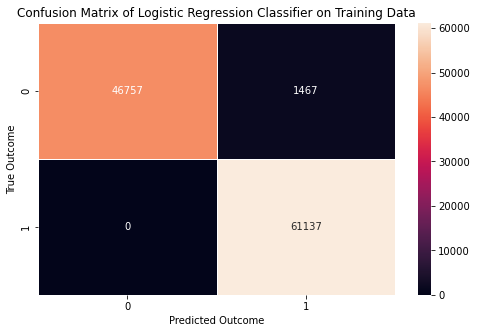

In [126]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_lr_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Logistic Regression Classifier on Training Data')
plt.show()

In [127]:
'''
Obtain the y_prediction probabilities for each record in the test dataset.
'''
y_predictions_lr_test = lr.predict(X_test_ld)

In [128]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the test dataset.
'''
cm_lr_test = confusion_matrix(y_test_ld, y_predictions_lr_test)

In [129]:
'''
Generate a Confusion Matrix for the Logistic Regression Classifier based on the test dataset.
'''
cm_lr_test = confusion_matrix(y_test_ld, y_predictions_lr_test)

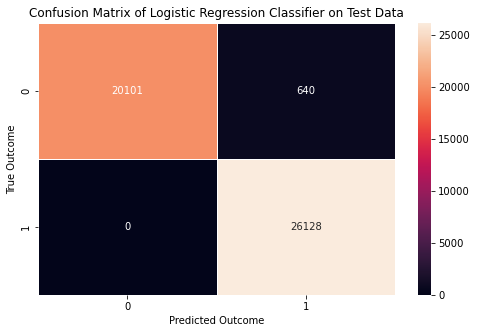

In [130]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_lr_test, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Logistic Regression Classifier on Test Data')
plt.show()

In [131]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test_ld, y_predictions_lr_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20741
           1       0.98      1.00      0.99     26128

    accuracy                           0.99     46869
   macro avg       0.99      0.98      0.99     46869
weighted avg       0.99      0.99      0.99     46869



In [132]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_lr_train = accuracy_score(y_train_ld, y_predictions_lr_train)
accuracy_lr_test = accuracy_score(y_test_ld, y_predictions_lr_test)
precision_lr = precision_score(y_test_ld, y_predictions_lr_test)
recall_lr = recall_score(y_test_ld, y_predictions_lr_test)
f1_lr = f1_score(y_test_ld, y_predictions_lr_test)
print("Accuracy of Logistic Regression Model on training data is:{}".format(accuracy_lr_train))
print("Accuracy of Logistic Regression Model on testing data is:{}".format(accuracy_lr_test))
print("Precision of Logistic Regression Model on testing data is:{}".format(precision_lr))
print("Recall of Logistic Regression Model on testing data is:{}".format(recall_lr))
print("F1 Score of Logistic Regression Model on testing data is:{}".format(f1_lr))

Accuracy of Logistic Regression Model on training data is:0.986585711542506
Accuracy of Logistic Regression Model on testing data is:0.9863449188162752
Precision of Logistic Regression Model on testing data is:0.9760908547519426
Recall of Logistic Regression Model on testing data is:1.0
F1 Score of Logistic Regression Model on testing data is:0.9879007864488808


### Predictive Modeling for Late Deliveries - Decision Tree Classifier

In [133]:
'''
Standardize the X_train and X_test datasets for the remainder of the models being evaluated.
'''
sc = StandardScaler()
X_train_ld = sc.fit_transform(X_train_ld)
X_test_ld = sc.transform(X_test_ld)

In [134]:
'''
Create the Decision Tree Classifier.
'''
dt = DecisionTreeClassifier()

In [135]:
'''
Fit the Decision Tree Classifier on the training dataset.
'''
decision_tree_classifier = dt.fit(X_train_ld, y_train_ld )
decision_tree_classifier

DecisionTreeClassifier()

In [136]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_dt_train = dt.predict(X_train_ld)

In [137]:
'''
Generate a Confusion Matrix for the Decision Tree Classifier based on the training dataset.
'''
cm_dt_train = confusion_matrix(y_train_ld, y_predictions_dt_train)

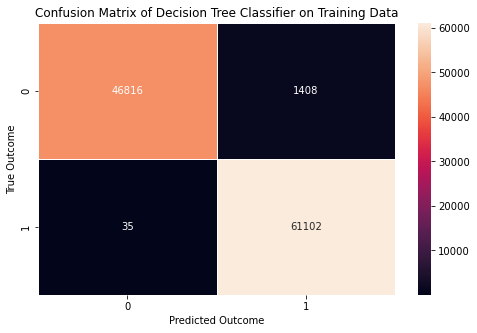

In [138]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_dt_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Decision Tree Classifier on Training Data')
plt.show()

In [139]:
'''
Obtain the y_predictions for the decision tree classifier.
'''
y_predictions_dt_test = dt.predict(X_test_ld)

In [140]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_dt = confusion_matrix(y_test_ld, y_predictions_dt_test)
cm_dt

array([[20104,   637],
       [   43, 26085]], dtype=int64)

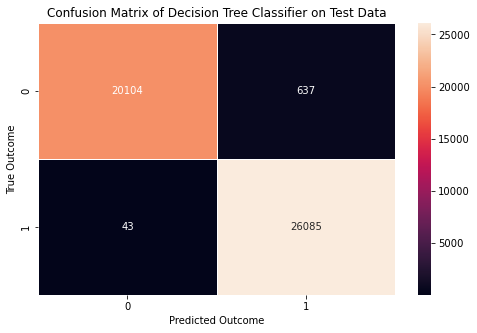

In [141]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_dt, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Decision Tree Classifier on Test Data')
plt.show()

In [142]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test_ld ,y_predictions_dt_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20741
           1       0.98      1.00      0.99     26128

    accuracy                           0.99     46869
   macro avg       0.99      0.98      0.99     46869
weighted avg       0.99      0.99      0.99     46869



In [143]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_dt_train = accuracy_score(y_train_ld, y_predictions_dt_train)
accuracy_dt_test = accuracy_score(y_test_ld, y_predictions_dt_test)
precision_dt = precision_score(y_test_ld, y_predictions_dt_test)
recall_dt = recall_score(y_test_ld, y_predictions_dt_test)
f1_dt = f1_score(y_test_ld, y_predictions_dt_test)
print("Accuracy of Decision Tree Model on training data is:{}".format(accuracy_dt_train))
print("Accuracy of Decision Tree Model on testing data is:{}".format(accuracy_dt_test))
print("Precision of Decision Tree Model on testing data is:{}".format(precision_dt))
print("Recall of Decision Tree Model on testing data is:{}".format(recall_dt))
print("F1 Score of Decision Tree Model on testing data is:{}".format(f1_dt))

Accuracy of Decision Tree Model on training data is:0.9868051682043874
Accuracy of Decision Tree Model on testing data is:0.9854914762422924
Precision of Decision Tree Model on testing data is:0.9761619639248559
Recall of Decision Tree Model on testing data is:0.9983542559706062
F1 Score of Decision Tree Model on testing data is:0.9871333964049195


### Predictive Modeling for Late Deliveries - Random Forest Classifier

In [144]:
'''
Create the Random Forest Classifier.
Select number of estimators based on error reduction plot for this model.
'''
rf = RandomForestClassifier(n_estimators = 21)

In [145]:
'''
Fit the Random Forest Classifier on the training dataset.
'''
random_forest_classifier = rf.fit(X_train_ld, y_train_ld)
random_forest_classifier

RandomForestClassifier(n_estimators=21)

In [146]:
'''
Obtain the y_prediction probabilities for each record in the training dataset.
'''
y_predictions_rf_train = rf.predict(X_train_ld)

In [147]:
'''
Generate a Confusion Matrix for the Random Forest Classifier based on the training dataset.
'''
cm_rf_train = confusion_matrix(y_train_ld, y_predictions_rf_train)

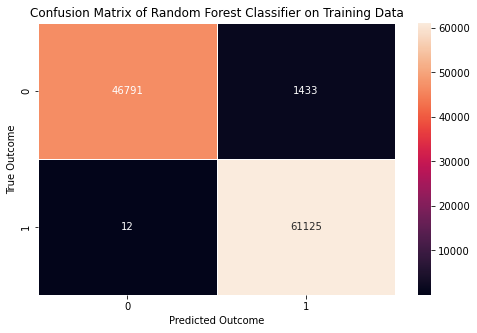

In [148]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_rf_train, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Random Forest Classifier on Training Data')
plt.show()

In [149]:
'''
Obtain the y_predictions for the Random Forest classifier.
'''
y_predictions_rf_test = rf.predict(X_test_ld)

In [150]:
'''
Generate a confusion matrix based on the test data set. 
'''
cm_rf = confusion_matrix(y_test_ld, y_predictions_rf_test)
cm_rf

array([[20099,   642],
       [   19, 26109]], dtype=int64)

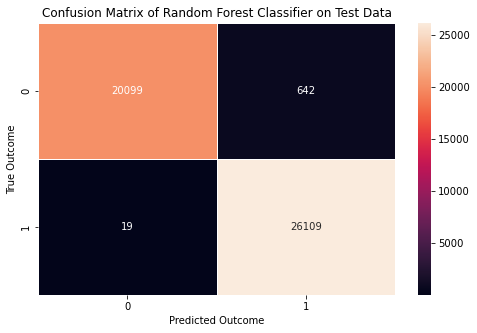

In [151]:
'''
Plot the confusion matrix so it is clearly labelled and illustrated.
'''
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(cm_rf, annot = True, linewidths = 0.5, fmt = ".0f", ax = ax)
plt.xlabel('Predicted Outcome')
plt.ylabel('True Outcome')
plt.title('Confusion Matrix of Random Forest Classifier on Test Data')
plt.show()

In [152]:
'''
Show the classification report for the test data.
'''
print(classification_report(y_test_ld, y_predictions_rf_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     20741
           1       0.98      1.00      0.99     26128

    accuracy                           0.99     46869
   macro avg       0.99      0.98      0.99     46869
weighted avg       0.99      0.99      0.99     46869



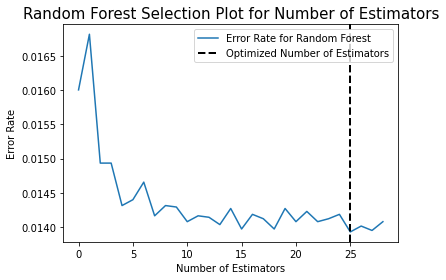

In [153]:
'''
Choose an optimal number of estimators for Random Forest by plotting the error rate for the model against the data.
'''
# Create an empty list for error rate.
error_rate_rf = []

# Create a for loop to get error rates appended to the error_rate list.
for i in np.arange(1, 30):

    new_model = RandomForestClassifier(n_estimators = i)

    new_model.fit(X_train_ld, y_train_ld)

    new_predictions = new_model.predict(X_test_ld)

    error_rate_rf.append(np.mean(new_predictions != y_test_ld))
    
# Create the plot to assist with selecting a K value for the KNN classifier.
plt.plot(error_rate_rf, label = 'Error Rate for Random Forest')
plt.title("Random Forest Selection Plot for Number of Estimators", fontsize=15) 
plt.xlabel("Number of Estimators", fontsize=10)
plt.ylabel("Error Rate", fontsize=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.axvline(x=pd.Series(error_rate_rf).idxmin(), linewidth = 2, color = 'k', linestyle = '--',
            label = 'Optimized Number of Estimators')
plt.legend(loc = 'upper right')
plt.show()

In [154]:
'''
Show the optimum number of estimators on the plot above.
'''
print('Optimum number of estimators for Random Forest:{}'.format(pd.Series(error_rate_rf).idxmin()))

Optimum number of estimators for Random Forest:25


In [155]:
'''
Calculate the accuracy for the model based on training and test data. Also, report the
Precision, Recall, and F1 score for the model predications against the test data.
'''
accuracy_rf_train = accuracy_score(y_train_ld, y_predictions_rf_train)
accuracy_rf_test = accuracy_score(y_test_ld, y_predictions_rf_test)
precision_rf = precision_score(y_test_ld, y_predictions_rf_test)
recall_rf = recall_score(y_test_ld, y_predictions_rf_test)
f1_rf = f1_score(y_test_ld, y_predictions_rf_test)
print("Accuracy of Random Forest Model on training data is:{}".format(accuracy_rf_train))
print("Accuracy of Random Forest Model on testing data is:{}".format(accuracy_rf_test))
print("Precision of Random Forest Model on testing data is:{}".format(precision_rf))
print("Recall of Random Forest Model on testing data is:{}".format(recall_rf))
print("F1 Score of Random Forest Model on testing data is:{}".format(f1_rf))

Accuracy of Random Forest Model on training data is:0.9867868801492305
Accuracy of Random Forest Model on testing data is:0.9858968614649342
Precision of Random Forest Model on testing data is:0.9760008971627229
Recall of Random Forest Model on testing data is:0.9992728107777097
F1 Score of Random Forest Model on testing data is:0.9874997636112633


### Highlights for Predictive Modeling:
<ul>
    <li> Sales Forecasting had 4 models trained and tested: Linear Regression, Lasso Regression, Decision Tree Regressor, and Random Forest Regressor.
    <li> Late Delivery prediction had 3 models trained and tested: Logistic Regression, Decision Tree Classifier, Random Forest Classifier.
    
<ul>

## 5) Evaluation

### Sales Forecasting Evaluation

In [156]:
'''
Create a dictionary summarizing the evaluation criteria for the four models.
'''
summary_data_sales = OrderedDict([('MAE', [lr_mae, lasso_mae, dt_mae, rf_mae]),
                           ('MSE', [lr_mse, lasso_mse, dt_mse, rf_mse]),
                           ('RMSE', [lr_rmse, lasso_rmse, dt_rmse, rf_rmse]),
                           ('R2_Score_Train', [lr_r2_train, lasso_r2_train, dt_r2_train, rf_r2_train]),
                           ('R2_Score_Test', [lr_r2, lasso_r2, dt_r2, rf_r2]),
                           ('Model', ['LinearRegression','Lasso', 'DecisionTree','RandomForest']),])

In [159]:
'''
Display the summary evaluation metrics for the four models in a pandas dataframe.
'''
summary_df_sales = pd.DataFrame(summary_data_sales, index = summary_data_sales['Model'])

In [160]:
'''
Sort the values based on the highest R-Squared Score on the test data.
'''
summary_df_sales.sort_values(by = "R2_Score_Test", ascending = False)

MAE          MSE       RMSE  R2_Score_Train  \
RandomForest       1.294214    57.025861   7.551547        0.999179   
DecisionTree       1.270657    95.617256   9.778408        0.999530   
Lasso             55.203839  5235.633555  72.357678        0.703851   
LinearRegression  54.914229  5237.498800  72.370566        0.704701   

                  R2_Score_Test             Model  
RandomForest           0.996715      RandomForest  
DecisionTree           0.994493      DecisionTree  
Lasso                  0.698444             Lasso  
LinearRegression       0.698337  LinearRegression

### Late Delivery Prediction Evaluation

In [161]:
'''
Create a dictionary summarizing the evaluation criteria for the models.
'''
summary_data_ld = OrderedDict([('Model', ['Logistic_Regression', 'Decision_Tree','Random_Forest']),
                           ('Model_Accuracy_Test',[accuracy_lr_test, accuracy_dt_test, accuracy_rf_test]),
                            ('Model_Accuracy_Training',[accuracy_lr_train, accuracy_dt_train, accuracy_rf_train]),
                           ('Model_Precision_Score',[precision_lr, precision_dt, precision_rf]),
                           ('Model_Recall_Score',[recall_lr,recall_dt,recall_rf]),
                           ('Model_F1_Score', [f1_lr,f1_dt, f1_rf]),])

In [162]:
'''
Display the summary evaluation metrics for the six models in a pandas dataframe.
Sort the Models based on accuracy for each model from the test dataset.
'''
summary_df_ld = pd.DataFrame(summary_data_ld, index = summary_data_ld['Model'])
display(summary_df_ld.sort_values(by = 'Model_Accuracy_Test', ascending = False))

Model  Model_Accuracy_Test  \
Logistic_Regression  Logistic_Regression             0.986345   
Random_Forest              Random_Forest             0.985897   
Decision_Tree              Decision_Tree             0.985491   

                     Model_Accuracy_Training  Model_Precision_Score  \
Logistic_Regression                 0.986586               0.976091   
Random_Forest                       0.986787               0.976001   
Decision_Tree                       0.986805               0.976162   

                     Model_Recall_Score  Model_F1_Score  
Logistic_Regression            1.000000        0.987901  
Random_Forest                  0.999273        0.987500  
Decision_Tree                  0.998354        0.987133

In [163]:
'''
Create a list of the models stored in a tuple along with the name.
'''
models = []
models.append(('Logistic_Regression', lr))
models.append(('Decision_Tree', dt))
models.append(('Random_Forest', rf))

In [164]:
'''
Check the models on 20 splits using kfold cross-validation.
'''
cv_results = []
names = []

for name,model in models:
    kfold = StratifiedKFold(n_splits = 20)
    results = cross_val_score(model, X_train_ld, y_train_ld, cv = kfold, scoring = 'accuracy')
    cv_results.append(results)
    names.append(name)
    print('Model Type:{}, Average Accuracy Score: {}, Standard Deviation: {}'.format(name, 
                                                                                      round(results.mean(), 4), 
                                                                                      round(results.std(), 4)))

Model Type:Logistic_Regression, Average Accuracy Score: 0.9866, Standard Deviation: 0.0015
Model Type:Decision_Tree, Average Accuracy Score: 0.9858, Standard Deviation: 0.0014
Model Type:Random_Forest, Average Accuracy Score: 0.9861, Standard Deviation: 0.0014


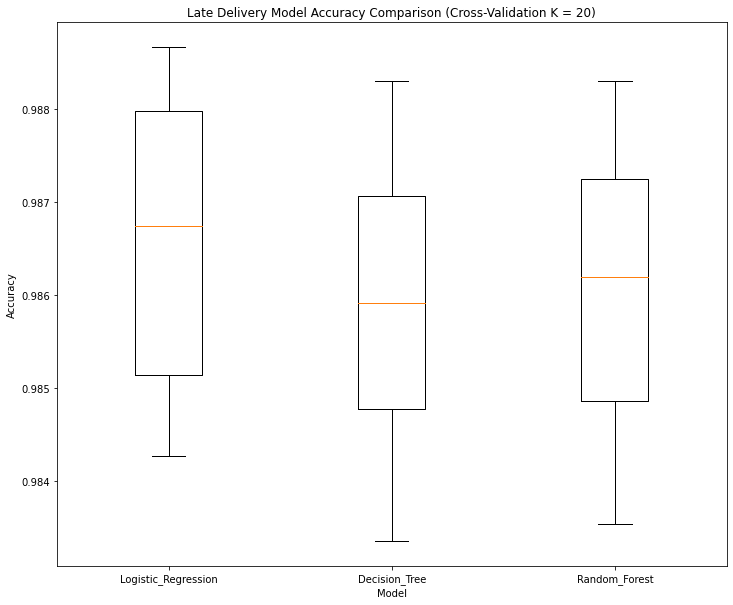

In [165]:
'''
Plot the model performance to show which models perform 
the most accurate along with which models have the most variation in accuracy.
'''
plt.figure(figsize = (12,10))
plt.boxplot(cv_results, labels = names)
plt.title("Late Delivery Model Accuracy Comparison (Cross-Validation K = 20)")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

### Highlights for Evaluation:
<ul>
    <li> Random Forest Regressor is best method for Sales Forecasting. (99.7% R2 score on test data)
    <li> Logistic Regression Classifier is best method for Late Delivery Prediction. (98.7% Accuracy after 20 k-folds cross-validation)
<ul>

## 6) Deployment Recommendation

The Random Forest Regressor for prediction of sales and the Logistic Regression Classifier for late delivery prediction appear ready for deployment. Prior to releasing the models, a few recommendations need to be made. First, recommend consulting technical experts within the supply chain group to confirm/discuss the findings. In addition, the data utilized in this analysis was from 2015-2018. I recommend utilizing more up-to-date data for training and testing. Lastly, I would recommend trying some alternative models for each case study to see if there are any additional improvements to the current model performance. Additional actions from this analysis include looking into the decline in sales from 2017-2018, investigating high profit orders from customers, and adjusting the scheduled delivery days currently used (or improve the lead time for days between orders processed and orders shipped).

### Create Results Directory

In [172]:
results_dir = Path('C:/Users/jkmey/Documents/Github/DSC680_Course_Assignments/DSC_680_Applied_Data_Science/Project_1/').joinpath('results')
results_dir.mkdir(parents=True, exist_ok = True)

In [173]:
'''
Save the Random Forest Model.
'''
rf_result_model_file = results_dir.joinpath('Sales_Forecasting_Model_RF.h5')
pickle.dump(model_rf, open(rf_result_model_file, 'wb'))

In [176]:
'''
Save the Logistic Regression Model.
'''
lr_result_model_file = results_dir.joinpath('Late_Delivery_Model_RF.h5')
pickle.dump(lr_classifier, open(lr_result_model_file, 'wb'))